#  **Projet3: Préparez des données pour un organisme de la santé publique**

#

## **01- Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection

import warnings
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## **02- Data Loading**

In [2]:
data_source = r"C:\Users\521169\Documents\Openclassrooms\Projet 3\Projet\openfoodfacts.csv"
data = pd.read_csv(data_source, sep='\t', encoding='utf-8')
data.head()

C:\Users\521169\AppData\Local\Temp\ipykernel_24360\3568269604.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_source, sep='\t', encoding='utf-8')


code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

## 

# **I- Prétaitement des données**

### **001- Colonnes manquantes**

In [3]:
data.isnull().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [4]:
data.dropna(axis=1, how='all').head()

code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... iodine_100g caffeine_100g taurine_100g ph_100g  \
0          NaN      1kg  ...         NaN           NaN          NaN     NaN   
1          NaN      NaN  ...         NaN           NaN          NaN     NaN   
2          NaN      NaN  ...         NaN           NaN          NaN     NaN   
3          NaN      NaN  ...         NaN           NaN          NaN     NaN   
4          NaN      NaN  ...         NaN           NaN          NaN     NaN   

  fruits-vegetables-nuts_100g collagen-meat-protein-ratio_100g cocoa_100g  \
0                         NaN                              NaN        NaN   
1                         NaN                              NaN        NaN   
2                         NaN                              NaN        NaN   
3                         NaN                              NaN        NaN   
4                         NaN                              NaN        NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  
0                   NaN                     NaN                     NaN  
1                   NaN                    14.0                    14.0  
2                   NaN                     0.0                     0.0  
3                   NaN                    12.0                    12.0  
4                   NaN                     NaN                     NaN  

[5 rows x 146 columns]

#### **On Enregistre 16 COLONNES CONSTITUES ENTIEREMENT DE VALEUR MANQUANTE.**

####

### **002- Analyse des Nutriscores**

#### (-- ' pnns_groups_1','pnns_groups_2' sont deux variables qui catégorise le nutriscore

In [5]:
data_pretraitement = data[['code','pnns_groups_1','pnns_groups_2']]
data_pretraitement

code pnns_groups_1 pnns_groups_2
0                3087           NaN           NaN
1                4530           NaN           NaN
2                4559           NaN           NaN
3               16087           NaN           NaN
4               16094           NaN           NaN
...               ...           ...           ...
320767  9948282780603           NaN           NaN
320768       99567453           NaN           NaN
320769  9970229501521  Salty snacks    Appetizers
320770  9980282863788           NaN           NaN
320771   999990026839           NaN           NaN

[320772 rows x 3 columns]

In [6]:
data_pretraitement = data_pretraitement.dropna(thresh = data_pretraitement.shape[1]-1)
data_pretraitement

code          pnns_groups_1          pnns_groups_2
46              24600                unknown                unknown
106             36252                unknown                unknown
136             39259                unknown                unknown
138             39529                unknown                unknown
174            290616  Fruits and vegetables             Vegetables
...               ...                    ...                    ...
320762  9908278636246                unknown                unknown
320763       99111250              Beverages  Non-sugared beverages
320765  9935010000003         Fish Meat Eggs         Processed meat
320766       99410148           Salty snacks                   Nuts
320769  9970229501521           Salty snacks             Appetizers

[94491 rows x 3 columns]

In [7]:
data_pretraitement = data_pretraitement[~data_pretraitement.apply(lambda row: ('unknown' in row.values) and (np.nan in row.values)|
                  ('unknown' in row.values) and ('unknown' in row.values) , axis=1)]
data_pretraitement

code          pnns_groups_1          pnns_groups_2
174            290616  Fruits and vegetables             Vegetables
175            394710          Sugary snacks     Biscuits and cakes
177           1071894   Cereals and potatoes                  Bread
180           1938067          Sugary snacks     Biscuits and cakes
182           5200016   Cereals and potatoes                Legumes
...               ...                    ...                    ...
320761  9906410000009                    NaN    Alcoholic beverages
320763       99111250              Beverages  Non-sugared beverages
320765  9935010000003         Fish Meat Eggs         Processed meat
320766       99410148           Salty snacks                   Nuts
320769  9970229501521           Salty snacks             Appetizers

[71867 rows x 3 columns]

#### -- Fusion des pnns_group1 et 2

In [8]:
data_pretraitement = data_pretraitement[['pnns_groups_1','pnns_groups_2']]
data_pretraitement

pnns_groups_1          pnns_groups_2
174     Fruits and vegetables             Vegetables
175             Sugary snacks     Biscuits and cakes
177      Cereals and potatoes                  Bread
180             Sugary snacks     Biscuits and cakes
182      Cereals and potatoes                Legumes
...                       ...                    ...
320761                    NaN    Alcoholic beverages
320763              Beverages  Non-sugared beverages
320765         Fish Meat Eggs         Processed meat
320766           Salty snacks                   Nuts
320769           Salty snacks             Appetizers

[71867 rows x 2 columns]

In [9]:
data_pretraitement['pnns_groups_12'] = data_pretraitement['pnns_groups_1'].fillna(data_pretraitement['pnns_groups_2'])
data_pretraitement =data_pretraitement
data_pretraitement 

pnns_groups_1          pnns_groups_2         pnns_groups_12
174     Fruits and vegetables             Vegetables  Fruits and vegetables
175             Sugary snacks     Biscuits and cakes          Sugary snacks
177      Cereals and potatoes                  Bread   Cereals and potatoes
180             Sugary snacks     Biscuits and cakes          Sugary snacks
182      Cereals and potatoes                Legumes   Cereals and potatoes
...                       ...                    ...                    ...
320761                    NaN    Alcoholic beverages    Alcoholic beverages
320763              Beverages  Non-sugared beverages              Beverages
320765         Fish Meat Eggs         Processed meat         Fish Meat Eggs
320766           Salty snacks                   Nuts           Salty snacks
320769           Salty snacks             Appetizers           Salty snacks

[71867 rows x 3 columns]

In [10]:
data_pretraitement = data_pretraitement[['pnns_groups_12']]
data_pretraitement

pnns_groups_12
174     Fruits and vegetables
175             Sugary snacks
177      Cereals and potatoes
180             Sugary snacks
182      Cereals and potatoes
...                       ...
320761    Alcoholic beverages
320763              Beverages
320765         Fish Meat Eggs
320766           Salty snacks
320769           Salty snacks

[71867 rows x 1 columns]

In [11]:
data_pretraitement['code'] = data[['code']]
data_pretraitement

C:\Users\521169\AppData\Local\Temp\ipykernel_24360\3206057232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pretraitement['code'] = data[['code']]


pnns_groups_12           code
174     Fruits and vegetables         290616
175             Sugary snacks         394710
177      Cereals and potatoes        1071894
180             Sugary snacks        1938067
182      Cereals and potatoes        5200016
...                       ...            ...
320761    Alcoholic beverages  9906410000009
320763              Beverages       99111250
320765         Fish Meat Eggs  9935010000003
320766           Salty snacks       99410148
320769           Salty snacks  9970229501521

[71867 rows x 2 columns]

#

##  II- Choix de l'application:  Application de conseille nutritionnelle pour  DIABETIQUE

### 01-  Choix des variables appropriés

In [12]:
data_variable0 = data[[ 'code','product_name','categories',
                                     'nutrition-score-fr_100g','fiber_100g','salt_100g','proteins_100g'
                                    ,'fat_100g','fruits-vegetables-nuts_100g','sugars_100g','fructose_100g',
                                    'sodium_100g','saturated-fat_100g','energy_100g'
                                  ]]
data_variable0.head()

code                    product_name categories  nutrition-score-fr_100g  \
0   3087              Farine de blé noir        NaN                      NaN   
1   4530  Banana Chips Sweetened (Whole)        NaN                     14.0   
2   4559                         Peanuts        NaN                      0.0   
3  16087          Organic Salted Nut Mix        NaN                     12.0   
4  16094                 Organic Polenta        NaN                      NaN   

   fiber_100g  salt_100g  proteins_100g  fat_100g  \
0         NaN        NaN            NaN       NaN   
1         3.6    0.00000           3.57     28.57   
2         7.1    0.63500          17.86     17.86   
3         7.1    1.22428          17.86     57.14   
4         5.7        NaN           8.57      1.43   

   fruits-vegetables-nuts_100g  sugars_100g  fructose_100g  sodium_100g  \
0                          NaN          NaN            NaN          NaN   
1                          NaN        14.29            NaN        0.000   
2                          NaN        17.86            NaN        0.250   
3                          NaN         3.57            NaN        0.482   
4                          NaN          NaN            NaN          NaN   

   saturated-fat_100g  energy_100g  
0                 NaN          NaN  
1               28.57       2243.0  
2                0.00       1941.0  
3                5.36       2540.0  
4                 NaN       1552.0

In [13]:
# Jointure interne
result_inner = pd.merge(data_variable0, data_pretraitement, on='code', how='inner')
result_inner.head()

code                    product_name  \
0   290616                    Salade Cesar   
1   394710  Danoises à la cannelle roulées   
2  1071894                           Flute   
3  1938067    Chaussons tressés aux pommes   
4  5200016               lentilles vertes    

                                          categories  nutrition-score-fr_100g  \
0                                   Légumes-feuilles                      6.0   
1      Snacks sucrés,Biscuits et gâteaux,Pâtisseries                      NaN   
2  Plant-based foods and beverages,Plant-based fo...                      NaN   
3      Snacks sucrés,Biscuits et gâteaux,Pâtisseries                      9.0   
4  Aliments et boissons à base de végétaux,Alimen...                      NaN   

   fiber_100g  salt_100g  proteins_100g  fat_100g  \
0        2.00      2.160          22.00      12.0   
1        2.05      0.922           4.79      14.4   
2         NaN        NaN            NaN       NaN   
3        2.00      0.647           3.33      10.7   
4         NaN        NaN            NaN       NaN   

   fruits-vegetables-nuts_100g  sugars_100g  fructose_100g  sodium_100g  \
0                          NaN          0.0            NaN        0.850   
1                          NaN         28.1            NaN        0.363   
2                          NaN          NaN            NaN          NaN   
3                          NaN         24.7            NaN        0.255   
4                          NaN          NaN            NaN          NaN   

   saturated-fat_100g  energy_100g         pnns_groups_12  
0                 7.0       1210.0  Fruits and vegetables  
1                 NaN       1520.0          Sugary snacks  
2                 NaN          NaN   Cereals and potatoes  
3                 2.0       1090.0          Sugary snacks  
4                 NaN          NaN   Cereals and potatoes

In [14]:
# Trie des variables numérique nécessaire pour faire la heatmap de correlation
Heatmape = result_inner.drop(columns = ["product_name", "categories","code","pnns_groups_12"])
Heatmape

nutrition-score-fr_100g  fiber_100g  salt_100g  proteins_100g  \
0                          6.0        2.00     2.1600          22.00   
1                          NaN        2.05     0.9220           4.79   
2                          NaN         NaN        NaN            NaN   
3                          9.0        2.00     0.6470           3.33   
4                          NaN         NaN        NaN            NaN   
...                        ...         ...        ...            ...   
71884                      NaN         NaN        NaN            NaN   
71885                      2.0        0.20     0.0254           0.50   
71886                      NaN         NaN        NaN            NaN   
71887                      NaN         NaN        NaN            NaN   
71888                      NaN         NaN        NaN            NaN   

       fat_100g  fruits-vegetables-nuts_100g  sugars_100g  fructose_100g  \
0          12.0                          NaN          0.0            NaN   
1          14.4                          NaN         28.1            NaN   
2           NaN                          NaN          NaN            NaN   
3          10.7                          NaN         24.7            NaN   
4           NaN                          NaN          NaN            NaN   
...         ...                          ...          ...            ...   
71884       NaN                          NaN          NaN            NaN   
71885       0.2                          NaN          0.5            NaN   
71886       NaN                          NaN          NaN            NaN   
71887       NaN                          NaN          NaN            NaN   
71888       NaN                          NaN          NaN            NaN   

       sodium_100g  saturated-fat_100g  energy_100g  
0            0.850                 7.0       1210.0  
1            0.363                 NaN       1520.0  
2              NaN                 NaN          NaN  
3            0.255                 2.0       1090.0  
4              NaN                 NaN          NaN  
...            ...                 ...          ...  
71884          NaN                 NaN          NaN  
71885        0.010                 0.2         21.0  
71886          NaN                 NaN          NaN  
71887          NaN                 NaN          NaN  
71888          NaN                 NaN          NaN  

[71889 rows x 11 columns]

### 

###  02-  Analyse des correlations: Heatmap

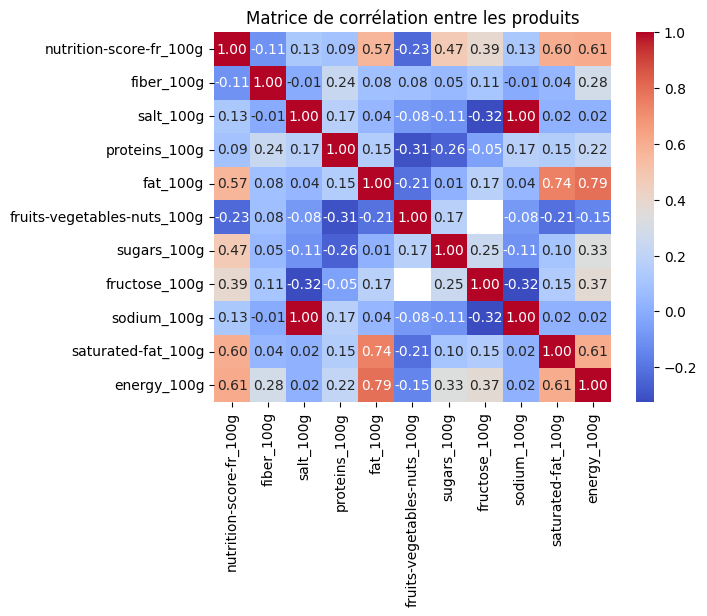

In [15]:
# Affichez un heatmap de la matrice de corrélation
correlation_matrix = Heatmape.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les produits")
plt.show()

### - Variables correlés

#### 1* Correlation entre salt_100g et sodium_100g  = 1
#### 2* Correlation entre fat_100g et saturated-fat_100g = 0,74
#### 3* Correlation entre fat_100g et energy_100g = 0,79
#### 4* Correlation entre saturated-fat_100g et energy_100g = 0,61  
#### 5* Correlation entre nutrition-score-fr_100g et energy_100g = 0,61


#

## 03- Gestion des Valeurs Abérrantes

### A- "fat_100g" représente la mesure totale de toutes les graisses
#### - "saturated-fat_100g" est une sous-catégorie de cette mesure totale

### NB: Toutes valeurs de "saturated-fat_100g" Supérieur ou égale à "fat_100g" est considérée comme abérrante

In [16]:
data_outliers = result_inner
outliers = data_outliers[data_outliers['saturated-fat_100g'] > data_outliers['fat_100g']]
outliers                         

code                            product_name  \
1401     78895300017                Panda Brand Oyster Sauce   
1402     78895300024  Sauce Huã Tre 420 ML LEE KUM KEE PANDA   
4256        20031244                        Macarons de coco   
7746        26038476               Bonbons Cassis Sans Sucre   
8090        26107851                    Vegetable Medley Tub   
...              ...                                     ...   
64870       80050124                        Tic Tac - Menthe   
64911       80052043                          Tic Tac Menthe   
65342  8021240910012          Pomodori Pelati Italiani Carla   
68254  8437008813202                                 Brócoli   
70929  8853662023236             sweet sour sauce thai pride   

                                              categories  \
1401       Groceries,Sauces,Sauce d'huitre,Oyster sauces   
1402      Groceries,Sauces,Sauce asiatique,Oyster sauces   
4256   Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...   
7746                                             bonbons   
8090   Plant-based foods and beverages,Plant-based fo...   
...                                                  ...   
64870                  Snacks sucrés,Confiseries,Bonbons   
64911                  Snacks sucrés,Confiseries,Bonbons   
65342  Aliments et boissons à base de végétaux,Alimen...   
68254  Verduras y hortalizas en conserva, Brócoli en ...   
70929                                   Sauces pimentées   

       nutrition-score-fr_100g  fiber_100g  salt_100g  proteins_100g  \
1401                      16.0         0.0   11.80000            2.2   
1402                      16.0         0.0   11.80000            2.2   
4256                      25.0         NaN    0.20000            4.5   
7746                       2.0         0.5    0.00000            0.0   
8090                      -8.0         1.9    0.07620            1.7   
...                        ...         ...        ...            ...   
64870                     14.0         0.0    0.02800            0.1   
64911                     14.0         0.0    0.02800            0.1   
65342                     -1.0         0.9    0.00000            1.2   
68254                     -3.0         NaN    0.70000            2.4   
70929                      NaN         NaN    0.75438            NaN   

       fat_100g  fruits-vegetables-nuts_100g  sugars_100g  fructose_100g  \
1401        0.0                          NaN      23.0000            NaN   
1402        0.0                          NaN      23.0000            NaN   
4256       23.0                          NaN      48.0000            NaN   
7746        0.0                          NaN       0.5000            NaN   
8090        0.4                          NaN       2.3000            NaN   
...         ...                          ...          ...            ...   
64870       0.3                          NaN      94.5000            NaN   
64911       0.0                          NaN      94.5000            NaN   
65342       0.1                          NaN       0.0001            NaN   
68254       0.4                          NaN       0.1000            NaN   
70929       0.0                          NaN       8.5000            NaN   

       sodium_100g  saturated-fat_100g  energy_100g         pnns_groups_12  
1401      4.645669                 0.1        540.0         Fat and sauces  
1402      4.645669                 0.1        540.0         Fat and sauces  
4256      0.078740                23.1       1990.0          Sugary snacks  
7746      0.000000                 0.5       1000.0          Sugary snacks  
8090      0.030000                 1.0        127.0  fruits-and-vegetables  
...            ...                 ...          ...                    ...  
64870     0.011024                 0.5       1661.0          Sugary snacks  
64911     0.011024                 0.5       1661.0          Sugary snacks  
65342     0.000000                 0.2         92.0    

#### *** 72 valeurs aberrantes entre les variables "fat_100g" et "saturated_fat_100g"

In [17]:
# Concaténer les dataframes
combined_df = pd.concat([data_outliers, outliers])
# Supprimer les doublons
outliers_fat = combined_df.drop_duplicates(subset=['nutrition-score-fr_100g','fiber_100g','salt_100g','proteins_100g','fat_100g','fruits-vegetables-nuts_100g','sugars_100g','fructose_100g','sodium_100g','saturated-fat_100g'], keep=False)
outliers_fat=outliers_fat.drop(columns = ['saturated-fat_100g'])
outliers_fat.head()

code                    product_name  \
0   290616                    Salade Cesar   
1   394710  Danoises à la cannelle roulées   
3  1938067    Chaussons tressés aux pommes   
6  8237798                 Quiche Lorraine   
7  8240095                  Pâté au poulet   

                                      categories  nutrition-score-fr_100g  \
0                               Légumes-feuilles                      6.0   
1  Snacks sucrés,Biscuits et gâteaux,Pâtisseries                      NaN   
3  Snacks sucrés,Biscuits et gâteaux,Pâtisseries                      9.0   
6                              Quiches lorraines                      2.0   
7                               Poulets cuisinés                      NaN   

   fiber_100g  salt_100g  proteins_100g  fat_100g  \
0       2.000      2.160          22.00     12.00   
1       2.050      0.922           4.79     14.40   
3       2.000      0.647           3.33     10.70   
6       0.357      0.499           5.36      6.79   
7         NaN      0.735          33.90     10.20   

   fruits-vegetables-nuts_100g  sugars_100g  fructose_100g  sodium_100g  \
0                          NaN        0.000            NaN        0.850   
1                          NaN       28.100            NaN        0.363   
3                          NaN       24.700            NaN        0.255   
6                          NaN        0.714            NaN        0.196   
7                          NaN          NaN            NaN        0.289   

   energy_100g         pnns_groups_12  
0       1210.0  Fruits and vegetables  
1       1520.0          Sugary snacks  
3       1090.0          Sugary snacks  
6        478.0        Composite foods  
7        751.0         Fish Meat Eggs

##

### B- Valeur energétique "energy_100g": analyse des outliers

In [18]:
# Selection des aliments qui ont une valeur energétique inférieur ou égale à 900kilos calories
outliers_kcal = outliers_fat
outliers_kcal = outliers_kcal[outliers_kcal['energy_100g'] <= 900]
outliers_kcal = outliers_kcal.drop(columns = ['energy_100g','fructose_100g'])
outliers_kcal

code                       product_name  \
6            8237798                    Quiche Lorraine   
7            8240095                     Pâté au poulet   
17               758                        Cauliflower   
19          87177756                                7Up   
28         790310020                         Jelly Fish   
...              ...                                ...   
71856  9556156046641               Yeo's Soy Bean Drink   
71857  9556156046726             Sauce pimentée à l'ail   
71863  9577283844672            100% Pur Jus 4 agrumes    
71866       96069868        tuna chunks in spring water   
71868       96092521  Santa Cruz Chilli & Lime Dressing   

                                              categories  \
6                                      Quiches lorraines   
7                                       Poulets cuisinés   
17     Plant-based foods and beverages,Plant-based fo...   
19                      Sodas au citron,Boissons sucrées   
28                 Sugary snacks,Confectioneries,Candies   
...                                                  ...   
71856                        Boissons à base de végétaux   
71857                   Epicerie,Sauces,Sauces pimentées   
71863  Aliments et boissons à base de végétaux,Boisso...   
71866                                        Tuna chunks   
71868                          Groceries,Dressing,Sauces   

       nutrition-score-fr_100g  fiber_100g  salt_100g  proteins_100g  \
6                          2.0       0.357    0.49900           5.36   
7                          NaN         NaN    0.73500          33.90   
17                         NaN       1.800    0.00000           3.60   
19                        13.0         NaN    0.10000           0.00   
28                         6.0       0.000    0.07620           0.00   
...                        ...         ...        ...            ...   
71856                     14.0       0.000    0.01000           2.00   
71857                      NaN         NaN    2.83972           0.00   
71863                      4.0       0.600    0.03000           0.60   
71866                     -1.0       0.000    0.76200          25.00   
71868                      6.0       0.600    0.54102           0.30   

       fat_100g  fruits-vegetables-nuts_100g  sugars_100g  sodium_100g  \
6          6.79                          NaN        0.714     0.196000   
7         10.20                          NaN          NaN     0.289000   
17         0.90                          NaN        2.500     0.000000   
19         0.00                          NaN       10.400     0.039370   
28         0.00                          NaN       24.000     0.030000   
...         ...                          ...          ...          ...   
71856       NaN                          NaN        8.300     0.003937   
71857      0.00                          NaN       17.650     1.118000   
71863      0.50                        100.0        9.200     0.011811   
71866      0.50                          NaN        0.000     0.300000   
71868      6.90                          NaN       16.700     0.213000   

              pnns_groups_12  
6            Composite foods  
7             Fish Meat Eggs  
17     Fruits and vegetables  
19                 Beverages  
28             Sugary snacks  
...                      ...  
71856              Beverages  
71857         Fat and sauces  
71863              Beverages  
71866         Fish Meat Eggs  
71868         Fat and sauces  

[20321 rows x 12 columns]

##

## C- Outliers: Méthode Interquartile

###  * Feature 1: salt_100g

In [19]:
outliers_IRQ = outliers_kcal 

q1_grouped = outliers_IRQ.groupby('pnns_groups_12')['salt_100g'].transform(lambda x: x.quantile(0.25))
q3_grouped = outliers_IRQ.groupby('pnns_groups_12')['salt_100g'].transform(lambda x: x.quantile(0.75))
outliers_IRQ['salt_100g_q31'] = q3_grouped - q1_grouped

# Définir les limites pour détecter les valeurs aberrantes pour chaque groupe
outliers_IRQ['salt_100g_seuil_inferieur'] = q1_grouped - 1.5 * outliers_IRQ['salt_100g_q31']
outliers_IRQ['salt_100g_seuil_superieur'] = q3_grouped + 1.5 * outliers_IRQ['salt_100g_q31']

# A1[A1['salt_100g'] > A1['salt_100g_seuil_superieur']]
outliers_salt = outliers_IRQ[['salt_100g','salt_100g_seuil_inferieur','salt_100g_seuil_superieur']] 
outliers_salt.head()

salt_100g  salt_100g_seuil_inferieur  salt_100g_seuil_superieur
6      0.4990                   0.165000                   1.565000
7      0.7350                  -0.900000                   3.900000
17     0.0000                  -1.055000                   1.785000
19     0.1000                  -0.070057                   0.122095
28     0.0762                  -0.164750                   0.301250

#### **salt_100g - Supérieur au 3ième Quartile  &&  Salt_100g  >  100g

In [20]:
outliers_salt_Sup = outliers_IRQ[outliers_IRQ['salt_100g'] > outliers_IRQ['salt_100g_seuil_superieur']]
outliers_salt_Supe = outliers_salt_Sup[['salt_100g','code']]
outliers_salt_Supe.sort_values(by='salt_100g', ascending=False).head(5)

salt_100g           code
3939      276.86  2000000045416
2716       76.20   812475012255
29317      74.00  3270160741199
2390       71.12   609613797286
66768      62.23  8413567011051

#### - La valeur 276.86 est  automatiquement une valeur Abérrant 
#### - Après consultation du site:
         - 74 g (indexe = 29317)  est normalement égale à 0,5g
         - 71,12 g (indexe = 2390)  est normalement égale à 0,071g
         - 60.96 g (indexe = 437)  est normalement égale à 1,5g
         - 76.20g (indexe = 2716) n'existe pas

In [21]:
id_code1 = 3270160741199
id_code2 = 609613797286
id_code3 = 28400040037
new_value1 = 0.5
new_value2 = 0.071
new_value3 = 1.5
# Recherche de l'index de la ligne à partir de l'ID et mise à jour du score
outliers_IRQ.loc[outliers_IRQ['code'] == id_code1, 'salt_100g'] = new_value1
outliers_IRQ.loc[outliers_IRQ['code'] == id_code2, 'salt_100g'] = new_value2
outliers_IRQ.loc[outliers_IRQ['code'] == id_code3, 'salt_100g'] = new_value3

#### **salt_100g - inférieur au 1er Quartile

In [22]:
outliers_salt_Inf = outliers_IRQ[outliers_IRQ['salt_100g'] < outliers_IRQ['salt_100g_seuil_inferieur']]
outliers_salt_Infe = outliers_salt_Inf[['salt_100g','code']]
outliers_salt_Infe.sort_values(by='salt_100g', ascending=True).head()

salt_100g           code
71236        0.0  9070275168560
61297        0.0  7610029162011
60654        0.0  6111032004950
58497        0.0  5407001943056
57853        0.0  5202258025551

#### - Aucune valeur Abérrante

#### **salt_100g Supérieur à 100g

In [23]:
outliers_salt_Sup100g = outliers_IRQ[outliers_IRQ['salt_100g'] > 100]
outliers_salt_Sup100g[['salt_100g','code']]

salt_100g           code
3939     276.86  2000000045416

In [24]:
outliers_sel = outliers_IRQ.drop([3939, 2716])
# car Valeur inexistente d'après son site

####

### * Feature 2: Sugars_100g

In [25]:
outliers_sugars = outliers_sel

q1_grouped = outliers_sugars.groupby('pnns_groups_12')['sugars_100g'].transform(lambda x: x.quantile(0.25))
q3_grouped = outliers_sugars.groupby('pnns_groups_12')['sugars_100g'].transform(lambda x: x.quantile(0.75))
outliers_sugars['sugars_100g_q31'] = q3_grouped - q1_grouped

# Définir les limites pour détecter les valeurs aberrantes pour chaque groupe
outliers_sugars['sugars_100g_seuil_inferieur'] = q1_grouped - 1.5 * outliers_sugars['sugars_100g_q31']
outliers_sugars['sugars_100g_seuil_superieur'] = q3_grouped + 1.5 * outliers_sugars['sugars_100g_q31']

# A1[A1['salt_100g'] > A1['salt_100g_seuil_superieur']]
outliers_sug = outliers_sugars[['sugars_100g','sugars_100g_seuil_inferieur','sugars_100g_seuil_superieur']] 
outliers_sug.head()

sugars_100g  sugars_100g_seuil_inferieur  sugars_100g_seuil_superieur
6         0.714                        -2.10                         5.90
7           NaN                        -1.25                         2.35
17        2.500                       -14.00                        26.80
19       10.400                        -3.70                        19.50
28       24.000                       -34.00                        84.40

#### **sugars_100g - Supérieur au 3ième Quartile  &&  Sugars_100g  >  100g

In [26]:
outliers_Sugars_Sup = outliers_sugars[outliers_sugars['sugars_100g'] > outliers_sugars['sugars_100g_seuil_superieur']]
outliers_Sugars_Supe = outliers_Sugars_Sup[['sugars_100g','code']]
outliers_Sugars_Supe.sort_values(by='sugars_100g', ascending=False).head()

sugars_100g           code
44072         67.0  3583788390923
16978         65.0  3222473592319
11319         63.5  3048633102200
15901         58.1  3191220006068
1495          51.0    84909023049

In [27]:
id_code1 = 3222473592319
id_code2 = 3191220006068
new_value1 = 6
new_value2 = 59.5
new_value3 = 49
# Recherche de l'index de la ligne à partir de l'ID et mise à jour du score
outliers_IRQ.loc[outliers_IRQ['code'] == id_code1, 'sugars_100g'] = new_value1
outliers_IRQ.loc[outliers_IRQ['code'] == id_code2, 'sugars_100g'] = new_value2
outliers_IRQ.loc[outliers_IRQ['code'] == id_code3, 'sugars_100g'] = new_value3

#### **sugars_100g Supérieur à 100g

In [28]:
outliers_Sug_Sup100g = outliers_sugars[outliers_sugars['sugars_100g'] > 100]
outliers_Sug_Sup100g[['sugars_100g','code']]

Empty DataFrame
Columns: [sugars_100g, code]
Index: []

#### **sugars_100g - inférieur au 1er Quartile

In [29]:
outliers_sug_Inf = outliers_sugars[outliers_sugars['sugars_100g'] < outliers_sugars['sugars_100g_seuil_inferieur']]
outliers_sug_Infe = outliers_sug_Inf[['sugars_100g','code']]
outliers_sug_Infe.sort_values(by='sugars_100g', ascending=True).head()

Empty DataFrame
Columns: [sugars_100g, code]
Index: []

##### **Aucune valeur Aberrante après vérification

####

### * Feature 3: Fiber_100g

In [30]:
outliers_fiber = outliers_sugars

q1_grouped = outliers_fiber.groupby('pnns_groups_12')['fiber_100g'].transform(lambda x: x.quantile(0.25))
q3_grouped = outliers_fiber.groupby('pnns_groups_12')['fiber_100g'].transform(lambda x: x.quantile(0.75))
outliers_fiber['fiber_100g_q31'] = q3_grouped - q1_grouped

# Définir les limites pour détecter les valeurs aberrantes pour chaque groupe
outliers_fiber['fiber_100g_seuil_inferieur'] = q1_grouped - 1.5 * outliers_fiber['fiber_100g_q31']
outliers_fiber['fiber_100g_seuil_superieur'] = q3_grouped + 1.5 * outliers_fiber['fiber_100g_q31']

outliers_fib = outliers_fiber[['fiber_100g','fiber_100g_seuil_inferieur','fiber_100g_seuil_superieur']] 
outliers_fib.head()

fiber_100g  fiber_100g_seuil_inferieur  fiber_100g_seuil_superieur
6        0.357                     -1.2500                      4.7500
7          NaN                     -0.9000                      1.5000
17       1.800                     -0.6000                      4.2000
19         NaN                     -0.7500                      1.2500
28       0.000                     -1.7375                      4.5625

#### **fiber_100g - Supérieur au 3ième Quartile  &&  fiber_100g  >  100g

In [31]:
outliers_fiber_Sup = outliers_fiber[outliers_fiber['fiber_100g'] > outliers_fiber['fiber_100g_seuil_superieur']]
outliers_fiber_Supe = outliers_fiber_Sup[['fiber_100g','code']]
outliers_fiber_Supe.sort_values(by='fiber_100g', ascending=False).head()

fiber_100g           code
65294        94.8  8017977015311
47968        86.2  3760020501518
59336        83.3  5411788045759
15340        75.0  3179142785100
22945        70.0  3256220666398

#### **fiber_100g Supérieur à 100g

In [32]:
outliers_fib_Sup100g = outliers_fiber[outliers_fiber['fiber_100g'] > 100]
outliers_fib_Sup100g[['fiber_100g','code']]

Empty DataFrame
Columns: [fiber_100g, code]
Index: []

#### **fiber_100g - inférieur au 1er Quartile

In [33]:
outliers_fib_Inf = outliers_fiber[outliers_fiber['fiber_100g'] < outliers_fiber['fiber_100g_seuil_inferieur']]
outliers_fib_Infe = outliers_fib_Inf[['fiber_100g','code']]
outliers_fib_Infe.sort_values(by='fiber_100g', ascending=True).head()

Empty DataFrame
Columns: [fiber_100g, code]
Index: []

##### Aucune valeur abérrante pour des valeurs inférieurs au 1 quartile après vérification

#

###  Feature 4 : proteins_100g

In [34]:
outliers_proteins = outliers_fiber 

q1_grouped = outliers_proteins.groupby('pnns_groups_12')['proteins_100g'].transform(lambda x: x.quantile(0.25))
q3_grouped = outliers_proteins.groupby('pnns_groups_12')['proteins_100g'].transform(lambda x: x.quantile(0.75))
outliers_proteins['proteins_100g_q31'] = q3_grouped - q1_grouped

# Définir les limites pour détecter les valeurs aberrantes pour chaque groupe
outliers_proteins['proteins_100g_seuil_inferieur'] = q1_grouped - 1.5 * outliers_proteins['proteins_100g_q31']
outliers_proteins['proteins_100g_seuil_superieur'] = q3_grouped + 1.5 * outliers_proteins['proteins_100g_q31']

outliers_prot = outliers_proteins[['proteins_100g','proteins_100g_seuil_inferieur','proteins_100g_seuil_superieur']] 
outliers_prot.head()

proteins_100g  proteins_100g_seuil_inferieur  \
6            5.36                         -2.950   
7           33.90                          4.500   
17           3.60                         -1.150   
19           0.00                         -0.875   
28           0.00                         -3.200   

    proteins_100g_seuil_superieur  
6                          15.050  
7                          32.500  
17                          3.250  
19                          1.485  
28                          6.400

#### **proteins_100g - Supérieur au 3ième Quartile  &&  proteins_100g  >  100g

In [35]:
outliers_proteins_Sup = outliers_proteins[outliers_proteins['proteins_100g'] > outliers_proteins['proteins_100g_seuil_superieur']]
outliers_proteins_Supe = outliers_proteins_Sup[['proteins_100g','code']]
outliers_proteins_Supe.sort_values(by='proteins_100g', ascending=False).head()

proteins_100g           code
12374          86.00  3092718618971
42708          72.00  3564700511930
60256          70.00  5707312003129
60254          67.00  5707312003105
69534          62.04  8692809031006

In [36]:
# Remplacement des outliers d'après le site produit
outliers_proteins["proteins_100g"].replace([86.0,72.0],[0, 0.5])

6         5.36
7        33.90
17        3.60
19        0.00
28        0.00
         ...  
71856     2.00
71857     0.00
71863     0.60
71866    25.00
71868     0.30
Name: proteins_100g, Length: 20319, dtype: float64

In [37]:
outliers_proteins_Sup100g = outliers_proteins[outliers_proteins['proteins_100g'] > 100]
outliers_proteins_Sup100g[['proteins_100g','code']]

Empty DataFrame
Columns: [proteins_100g, code]
Index: []

#### **proteines_100g Inférieur à 100g

In [38]:
outliers_prot_Inf = outliers_proteins[outliers_proteins['proteins_100g'] < outliers_proteins['proteins_100g_seuil_inferieur']]
outliers_prot_Infe = outliers_prot_Inf[['proteins_100g','code']]
outliers_prot_Infe.sort_values(by='proteins_100g', ascending=True).head()

proteins_100g           code
30571            0.0  3274661092750
23716            0.0  3256224110354
35696            0.0  3392780003195
37721            0.0  3456770034160
39700            0.0  3560070259830

##### Aucune valeur abérrante  après vérification

#

### * Feature 5 : fat_100g

In [39]:
outliers_fat = outliers_proteins

q1_grouped = outliers_fat.groupby('pnns_groups_12')['fat_100g'].transform(lambda x: x.quantile(0.25))
q3_grouped = outliers_fat.groupby('pnns_groups_12')['fat_100g'].transform(lambda x: x.quantile(0.75))
outliers_fat['fat_100g_q31'] = q3_grouped - q1_grouped

# Définir les limites pour détecter les valeurs aberrantes pour chaque groupe
outliers_fat['fat_100g_seuil_inferieur'] = q1_grouped - 1.5 * outliers_fiber['fat_100g_q31']
outliers_fat['fat_100g_seuil_superieur'] = q3_grouped + 1.5 * outliers_fiber['fat_100g_q31']

outliers_fater = outliers_fat[['fat_100g','fat_100g_seuil_inferieur','fat_100g_seuil_superieur']] 
outliers_fater.head()

fat_100g  fat_100g_seuil_inferieur  fat_100g_seuil_superieur
6       6.79                   -3.9500                   14.8500
7      10.20                   -9.7375                   22.3625
17      0.90                   -0.7500                    1.5700
19      0.00                   -0.7500                    1.2500
28      0.00                   -2.7500                    4.8500

#### **fat_100g - Supérieur au 3ième Quartile  &&  fat_100g  >  100g

In [40]:
outliers_fat_Sup = outliers_fat[outliers_fat['fat_100g'] > outliers_fat['fat_100g_seuil_superieur']]
outliers_fat_Supe = outliers_fat_Sup[['fat_100g','code']]
outliers_fat_Supe.sort_values(by='fat_100g', ascending=False).head()

fat_100g           code
50120      99.0  3770004096046
5595       92.0       20437664
47147      83.8  3700169160108
56396      82.9  5010251731139
1888       73.0       01832457

In [41]:
outliers_fat_Sup100g = outliers_fat[outliers_fat['fat_100g'] > 100]
outliers_fat_Sup100g[['fat_100g']]

Empty DataFrame
Columns: [fat_100g]
Index: []

#### **fat_100g inférieur à 100g

In [42]:
outliers_fat_Inf = outliers_fat[outliers_fat['fat_100g'] < outliers_fat['fat_100g_seuil_inferieur']]
outliers_fat_Infe = outliers_fat_Inf[['fat_100g']]
outliers_fat_Infe.sort_values(by='fat_100g', ascending=True).head()

Empty DataFrame
Columns: [fat_100g]
Index: []

##### Aucune valeur abérrante  après vérification

#

###  * Feature 6 : fruits-vegetables-nuts_100g

In [43]:
# calcul des différents interquartile
outliers_fruit = outliers_fat

q1_grouped = outliers_fruit.groupby('pnns_groups_12')['fruits-vegetables-nuts_100g'].transform(lambda x: x.quantile(0.25))
q3_grouped = outliers_fruit.groupby('pnns_groups_12')['fruits-vegetables-nuts_100g'].transform(lambda x: x.quantile(0.75))
outliers_fruit['fruit_100g_q31'] = q3_grouped - q1_grouped

# Définir les limites pour détecter les valeurs aberrantes pour chaque groupe
outliers_fruit['fruit_100g_seuil_inferieur'] = q1_grouped - 1.5 * outliers_fruit['fruit_100g_q31']
outliers_fruit['fruit_100g_seuil_superieur'] = q3_grouped + 1.5 * outliers_fruit['fruit_100g_q31']

outliers_fru = outliers_fruit[['fruits-vegetables-nuts_100g','fruit_100g_seuil_inferieur','fruit_100g_seuil_superieur']] 
outliers_fru.head()

fruits-vegetables-nuts_100g  fruit_100g_seuil_inferieur  \
6                           NaN                    -38.4125   
7                           NaN                    -19.5000   
17                          NaN                    -30.0000   
19                          NaN                    -75.0000   
28                          NaN                     27.5000   

    fruit_100g_seuil_superieur  
6                     107.4875  
7                      32.5000  
17                    162.0000  
19                    157.0000  
28                     87.5000

#### **fruits-vegetables-nuts_100g - Supérieur au 3ième Quartile  && fruits-vegetables-nuts_100g  >  100g

In [44]:
outliers_fruit_Sup = outliers_fruit[outliers_fruit['fruits-vegetables-nuts_100g'] > outliers_fruit['fat_100g_seuil_superieur']]
outliers_fruit_Supe = outliers_fruit_Sup[['fruits-vegetables-nuts_100g','code']]
outliers_fruit_Supe.sort_values(by='fruits-vegetables-nuts_100g', ascending=False).head()

fruits-vegetables-nuts_100g           code
71863                        100.0  9577283844672
9484                         100.0  3021762412464
44673                        100.0  3596710321018
44291                        100.0  3596710033157
44008                        100.0  3580283512300

In [45]:
# fruits-vegetables-nuts_100g > 100g
outliers_fruit_Sup100g = outliers_fruit[outliers_fruit['fruits-vegetables-nuts_100g'] > 100]
outliers_fruit_Sup100g[['fruits-vegetables-nuts_100g']]

Empty DataFrame
Columns: [fruits-vegetables-nuts_100g]
Index: []

In [46]:
# fruits-vegetables-nuts_100g < 1 quartile
outliers_fruit_Inf = outliers_fruit[outliers_fruit['fat_100g'] < outliers_fruit['fruit_100g_seuil_inferieur']]
outliers_fruit_Infe = outliers_fruit_Inf[['fruits-vegetables-nuts_100g','code']]
outliers_fruit_Infe.sort_values(by='fruits-vegetables-nuts_100g', ascending=True).head()

fruits-vegetables-nuts_100g           code
64551                          0.0  8001505005608
31946                          0.0  3299430063175
68800                          5.0  8480017044075
22985                         34.0  3256220851121
24954                         35.0  3257981946248

In [47]:
outliers_fruit["fruits-vegetables-nuts_100g"] = outliers_fruit["fruits-vegetables-nuts_100g"].replace({64551:60,31946:66.6})

##### Aucune valeur abérrante  après vérification

####

###  * Feature 7 : nutrition-score-fr_100g

In [48]:
# calcul des différents interquartile
outliers_score = outliers_fruit

q1_grouped = outliers_score.groupby('pnns_groups_12')['nutrition-score-fr_100g'].transform(lambda x: x.quantile(0.25))
q3_grouped = outliers_score.groupby('pnns_groups_12')['nutrition-score-fr_100g'].transform(lambda x: x.quantile(0.75))
outliers_score['nutrition-score_q31'] = q3_grouped - q1_grouped

# Définir les limites pour détecter les valeurs aberrantes pour chaque groupe
outliers_score['nutrition-score_seuil_inferieur'] = q1_grouped - 1.5 * outliers_score['nutrition-score_q31']
outliers_score['nutrition-score_seuil_superieur'] = q3_grouped + 1.5 * outliers_score['nutrition-score_q31']

outliers_nutri = outliers_score[['nutrition-score-fr_100g','nutrition-score_seuil_inferieur','nutrition-score_seuil_superieur']] 
outliers_nutri.head()

nutrition-score-fr_100g  nutrition-score_seuil_inferieur  \
6                       2.0                             -7.0   
7                       NaN                            -14.0   
17                      NaN                            -13.5   
19                     13.0                            -13.0   
28                      6.0                             -8.5   

    nutrition-score_seuil_superieur  
6                               9.0  
7                              26.0  
17                              6.5  
19                             27.0  
28                             19.5

#### **nutrition-score-fr_100g - Supérieur au 3ième Quartile  && nutrition-score-fr_100g >  100g

In [49]:
outliers_score_Sup = outliers_score[outliers_score['fruits-vegetables-nuts_100g'] > outliers_score['nutrition-score-fr_100g']]
outliers_score_Supe = outliers_score_Sup[['nutrition-score-fr_100g']]
outliers_score_Supe.sort_values(by='nutrition-score-fr_100g', ascending=False).head()

nutrition-score-fr_100g
13559                     20.0
71084                     19.0
41259                     19.0
17371                     19.0
31560                     19.0

In [50]:
# fruits-vegetables-nuts_100g > 100g
outliers_score_Sup100g = outliers_score[outliers_score['nutrition-score-fr_100g'] > 100]
outliers_score_Sup100g[['nutrition-score-fr_100g']]

Empty DataFrame
Columns: [nutrition-score-fr_100g]
Index: []

In [51]:
# fruits-vegetables-nuts_100g < 1 quartile
outliers_score_Inf = outliers_score[outliers_score['nutrition-score-fr_100g'] < outliers_score['nutrition-score-fr_100g']]
outliers_score_Infe = outliers_score_Inf[['nutrition-score-fr_100g']]
outliers_score_Infe.sort_values(by='nutrition-score-fr_100g', ascending=True).head()

Empty DataFrame
Columns: [nutrition-score-fr_100g]
Index: []

In [52]:
# fruits-vegetables-nuts_100g < 1 quartile
outliers_score_Inf = outliers_score[outliers_score['nutrition-score-fr_100g'] < 0 ]
outliers_score_Infe = outliers_score_Inf[['nutrition-score-fr_100g','code']]
outliers_score_Infe.sort_values(by='nutrition-score-fr_100g', ascending=True).head()

nutrition-score-fr_100g           code
35436                    -15.0  3380390204408
59331                    -14.0  5411788045094
16228                    -14.0  3222471016886
28981                    -14.0  3270160103713
68541                    -14.0  8480000610232

In [53]:
outliers_score = outliers_score.drop(columns = ['fruit_100g_seuil_superieur','fruit_100g_seuil_inferieur','fruit_100g_q31','fat_100g_seuil_superieur',
                                                  'fat_100g_seuil_inferieur','fat_100g_q31','proteins_100g_seuil_superieur','proteins_100g_seuil_inferieur',
                                                    'proteins_100g_q31','fiber_100g_seuil_superieur','fiber_100g_seuil_inferieur','fiber_100g_q31','sugars_100g_seuil_superieur',
                                                  'sugars_100g_seuil_inferieur','sugars_100g_q31','salt_100g_seuil_superieur','salt_100g_seuil_inferieur',
                                                  'salt_100g_q31','product_name','fruit_100g_seuil_inferieur','fruit_100g_seuil_superieur','categories','code','sodium_100g',
                                                'nutrition-score_seuil_inferieur','nutrition-score_seuil_superieur','nutrition-score_q31'
                                                ]
                                    )

In [54]:
outliers_score.isnull().sum()

nutrition-score-fr_100g         1610
fiber_100g                      7240
salt_100g                        911
proteins_100g                    169
fat_100g                        1325
fruits-vegetables-nuts_100g    18840
sugars_100g                      900
pnns_groups_12                     0
dtype: int64

#

## 04* Gestion des valeurs manquantes 
 ### * 1er Méthode: Médiane

In [55]:
missing_value = outliers_score

# Calcul de la médiane de chaque nutriment
missing_value['médiane_fiber'] = missing_value.groupby('pnns_groups_12')['fiber_100g'].transform('median')
missing_value['médiane_fatt'] = missing_value.groupby('pnns_groups_12')['fat_100g'].transform('median')
missing_value['médiane_fruits_vegetables'] = missing_value.groupby('pnns_groups_12')['fruits-vegetables-nuts_100g'].transform('median')

missing_value['médiane_salt'] = missing_value.groupby('pnns_groups_12')['salt_100g'].transform('median')
missing_value['médiane_proteins'] = missing_value.groupby('pnns_groups_12')['proteins_100g'].transform('median')
missing_value['médiane_sugars'] = missing_value.groupby('pnns_groups_12')['sugars_100g'].transform('median')


In [56]:
# Remplacer les valeurs manquantes par la médiane de chaque nutiment
missing_value['salt_100g'] = missing_value.apply(lambda row: row['médiane_salt'] if pd.isnull(row['salt_100g']) else row['salt_100g'], axis=1)
missing_value['fat_100g'] = missing_value.apply(lambda row: row['médiane_fatt'] if pd.isnull(row['fat_100g']) else row['fat_100g'], axis=1)
missing_value['fruits-vegetables-nuts_100g'] = missing_value.apply(lambda row: row['médiane_fruits_vegetables'] if pd.isnull(row['fruits-vegetables-nuts_100g']) else row['fruits-vegetables-nuts_100g'], axis=1)

missing_value['sugars_100g'] = missing_value.apply(lambda row: row['médiane_sugars'] if pd.isnull(row['sugars_100g']) else row['sugars_100g'], axis=1)
missing_value['proteins_100g'] = missing_value.apply(lambda row: row['médiane_proteins'] if pd.isnull(row['proteins_100g']) else row['proteins_100g'], axis=1)
missing_value['fiber_100g'] = missing_value.apply(lambda row: row['médiane_fiber'] if pd.isnull(row['fiber_100g']) else row['fiber_100g'], axis=1)

missing_value.head()

nutrition-score-fr_100g  fiber_100g  salt_100g  proteins_100g  fat_100g  \
6                       2.0       0.357     0.4990           5.36      6.79   
7                       NaN       0.130     0.7350          33.90     10.20   
17                      NaN       1.800     0.0000           3.60      0.90   
19                     13.0       0.100     0.1000           0.00      0.00   
28                      6.0       0.000     0.0762           0.00      0.00   

    fruits-vegetables-nuts_100g  sugars_100g         pnns_groups_12  \
6                          33.0        0.714        Composite foods   
7                           0.0        0.500         Fish Meat Eggs   
17                         60.0        2.500  Fruits and vegetables   
19                         40.0       10.400              Beverages   
28                         60.0       24.000          Sugary snacks   

    médiane_fiber  médiane_fatt  médiane_fruits_vegetables  médiane_salt  \
6            1.60           5.4                       33.0      0.830000   
7            0.13           5.5                        0.0      1.500000   
17           1.80           0.4                       60.0      0.334391   
19           0.10           0.1                       40.0      0.013002   
28           1.30           0.5                       60.0      0.050000   

    médiane_proteins  médiane_sugars  
6                6.1             1.7  
7               20.0             0.5  
17               0.9             3.5  
19               0.4             9.0  
28               0.6            30.0

In [57]:
missing_value.isnull().sum()

nutrition-score-fr_100g        1610
fiber_100g                        0
salt_100g                         0
proteins_100g                     0
fat_100g                          0
fruits-vegetables-nuts_100g     156
sugars_100g                       0
pnns_groups_12                    0
médiane_fiber                     0
médiane_fatt                      0
médiane_fruits_vegetables       156
médiane_salt                      0
médiane_proteins                  0
médiane_sugars                    0
dtype: int64

######

### 2ième Méthode: Remplacement  par imputation par la moyenne

In [58]:
imputer = SimpleImputer(strategy='mean')
missing_value['nutrition-score-fr_100g'] = imputer.fit_transform(missing_value[['nutrition-score-fr_100g']])
missing_value['fruits-vegetables-nuts_100g'] = imputer.fit_transform(missing_value[['fruits-vegetables-nuts_100g']])

missing_value_int = missing_value.drop(columns = ['médiane_sugars','médiane_fiber','médiane_proteins','médiane_salt',
                                                  'médiane_fatt','médiane_nutri','médiane_fruits_vegetables'], errors='ignore')
missing_value_int.isnull().sum()

nutrition-score-fr_100g        0
fiber_100g                     0
salt_100g                      0
proteins_100g                  0
fat_100g                       0
fruits-vegetables-nuts_100g    0
sugars_100g                    0
pnns_groups_12                 0
dtype: int64

In [59]:
missing_value_int

nutrition-score-fr_100g  fiber_100g  salt_100g  proteins_100g  \
6                      2.00000       0.357    0.49900           5.36   
7                      2.87792       0.130    0.73500          33.90   
17                     2.87792       1.800    0.00000           3.60   
19                    13.00000       0.100    0.10000           0.00   
28                     6.00000       0.000    0.07620           0.00   
...                        ...         ...        ...            ...   
71856                 14.00000       0.000    0.01000           2.00   
71857                  2.87792       1.300    2.83972           0.00   
71863                  4.00000       0.600    0.03000           0.60   
71866                 -1.00000       0.000    0.76200          25.00   
71868                  6.00000       0.600    0.54102           0.30   

       fat_100g  fruits-vegetables-nuts_100g  sugars_100g  \
6          6.79                         33.0        0.714   
7         10.20                          0.0        0.500   
17         0.90                         60.0        2.500   
19         0.00                         40.0       10.400   
28         0.00                         60.0       24.000   
...         ...                          ...          ...   
71856      0.10                         40.0        8.300   
71857      0.00                          0.0       17.650   
71863      0.50                        100.0        9.200   
71866      0.50                          0.0        0.000   
71868      6.90                          0.0       16.700   

              pnns_groups_12  
6            Composite foods  
7             Fish Meat Eggs  
17     Fruits and vegetables  
19                 Beverages  
28             Sugary snacks  
...                      ...  
71856              Beverages  
71857         Fat and sauces  
71863              Beverages  
71866         Fish Meat Eggs  
71868         Fat and sauces  

[20319 rows x 8 columns]

In [60]:
# missing_value_int.to_csv(r"C:\Users\521169\Documents\Openclassrooms\Projet 3\P3\dataset.csv", index=False)

In [320]:
# missing_value_int.describe()

missing_value_int.sort_values(by= "nutrition-score-fr_100g", ascending = True).tail(10)

nutrition-score-fr_100g  fiber_100g  salt_100g  proteins_100g  \
2910                      22.0         0.0       6.46          2.000   
56822                     22.0         0.1       0.06          1.300   
51680                     23.0         0.3       0.11          3.000   
70805                     24.0         0.0      12.40          0.000   
39476                     24.0         0.1       2.60          0.200   
35281                     25.0         0.0      15.00          0.100   
60056                     26.0         0.0      22.86          0.200   
70823                     28.0         0.0      18.00          0.001   
70840                     29.0         0.0       0.45          0.000   
55686                     30.0         0.0       7.62          0.000   

       fat_100g  fruits-vegetables-nuts_100g  sugars_100g       pnns_groups_12  
2910       0.00                     0.000000        47.50       Fat and sauces  
56822     17.40                    40.000000         1.70            Beverages  
51680      7.90                    40.000000        11.40            Beverages  
70805      0.00                     0.000000        10.40            Beverages  
39476      0.11                     0.000000        10.50            Beverages  
35281      0.10                    40.000000        11.80            Beverages  
60056      0.00                    29.147301         7.76  Alcoholic beverages  
70823      0.10                    40.000000        11.50            Beverages  
70840      0.10                    40.000000        38.00            Beverages  
55686      0.00                    40.000000        15.83            Beverages

#

# Variable Overview

In [61]:
missing_value_int.describe()

nutrition-score-fr_100g    fiber_100g     salt_100g  proteins_100g  \
count             20319.000000  20319.000000  20319.000000   20319.000000   
mean                  2.877920      1.234203      0.771238       5.320646   
std                   5.851928      2.278334      1.700714       6.573361   
min                 -15.000000      0.000000      0.000000       0.000000   
25%                  -1.000000      0.100000      0.050800       0.700000   
50%                   2.877920      0.800000      0.359000       3.000000   
75%                   5.000000      1.700000      0.997110       6.900000   
max                  30.000000     94.800000     62.230000      86.000000   

           fat_100g  fruits-vegetables-nuts_100g   sugars_100g  
count  20319.000000                 20319.000000  20319.000000  
mean       3.598716                    29.147301      6.239198  
std        4.607558                    25.222731      7.495425  
min        0.000000                     0.000000      0.000000  
25%        0.290000                     5.000000      1.000000  
50%        2.000000                    33.000000      3.500000  
75%        5.500000                    40.000000     10.000000  
max       99.000000                   100.000000     67.000000

In [62]:
missing_value_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20319 entries, 6 to 71868
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nutrition-score-fr_100g      20319 non-null  float64
 1   fiber_100g                   20319 non-null  float64
 2   salt_100g                    20319 non-null  float64
 3   proteins_100g                20319 non-null  float64
 4   fat_100g                     20319 non-null  float64
 5   fruits-vegetables-nuts_100g  20319 non-null  float64
 6   sugars_100g                  20319 non-null  float64
 7   pnns_groups_12               20319 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.4+ MB


In [63]:
data_analisis = missing_value_int

# 

#

# III-  Analyse des variables Univariés

#####

## ********************************************** Salt ******************************************************

### 01- Distribution

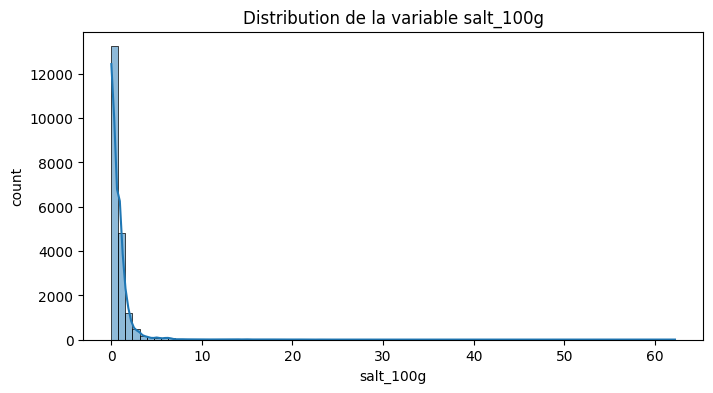

In [64]:
plt.figure(figsize=(8, 4))
sns.histplot(data_analisis['salt_100g'], bins=80, kde=True)
plt.title('Distribution de la variable salt_100g')
plt.xlabel('salt_100g')
plt.ylabel('count')
plt.show()

Note: On constate que le "sel" est un nutriment très peu utilisé en proportion(proche de zéro) dans les aliments. Ce qui est une bonne nouvelle pour la santé.

####

### 02- Analyse du Boxplot(Interquartile) : salt_100g 

C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


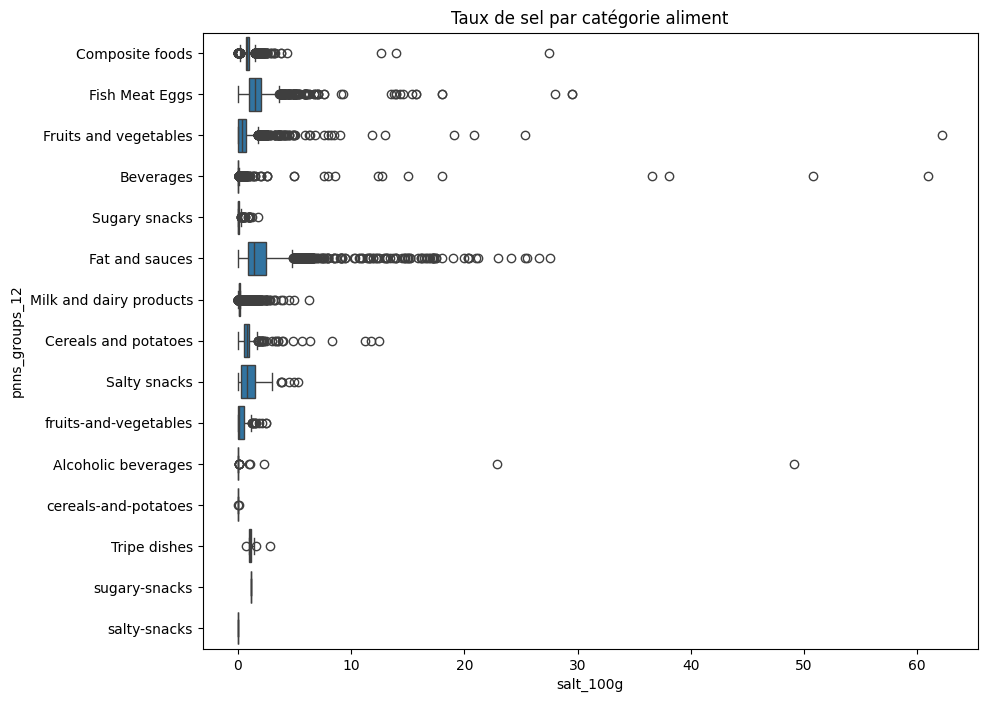

In [65]:
plt.figure(figsize=(10, 8))
sns.boxplot(data_analisis, x='salt_100g', y='pnns_groups_12')
plt.title('Taux de sel par catégorie aliment')
plt.xlabel('salt_100g')
plt.ylabel('pnns_groups_12')
plt.show()

### 03- Barplot: salt_100g **

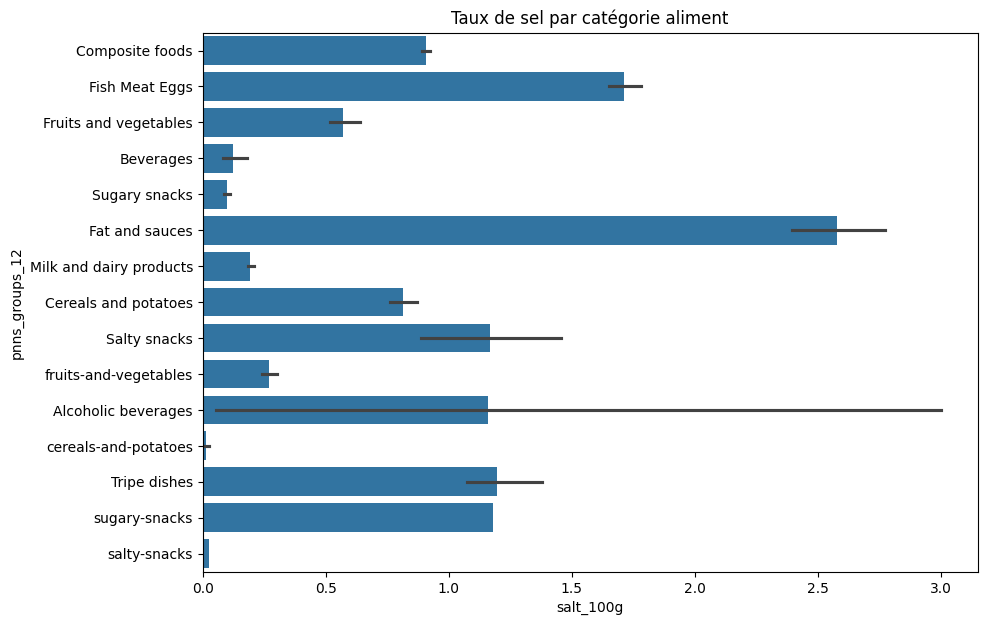

In [66]:
plt.figure(figsize=(10, 7))
sns.barplot(data_analisis,x='salt_100g', y='pnns_groups_12')
plt.title('Taux de sel par catégorie aliment')
plt.xlabel('salt_100g')
plt.ylabel('pnns_groups_12')
plt.show()

Note: Les aliments tels que: "Beverages", "Sugary snacks", "Milk and daily product" ont des proportions en sel acceptable mais, à consommer avec modération. Par contre l'aliment "Fat and sauce" est à éviter automatiquement. 

###  04- Descriptive: salt_100g 

In [67]:
data_analisis['salt_100g'].describe()

count    20319.000000
mean         0.771238
std          1.700714
min          0.000000
25%          0.050800
50%          0.359000
75%          0.997110
max         62.230000
Name: salt_100g, dtype: float64

Interprétations:
- Moins de 25% d'aliments contiennent environ 0,05g de sel(pour 100g d'aliment)
- Moins 50% d'aliments contiennent environ 0,52g de sel(pour 100g d'aliment)
- plus de 25% d'aliments contiennent environ 1,2g de sel(pour 100g d'aliment)

#

# *********************************   Sugars  *************************************

### 001- Distribution

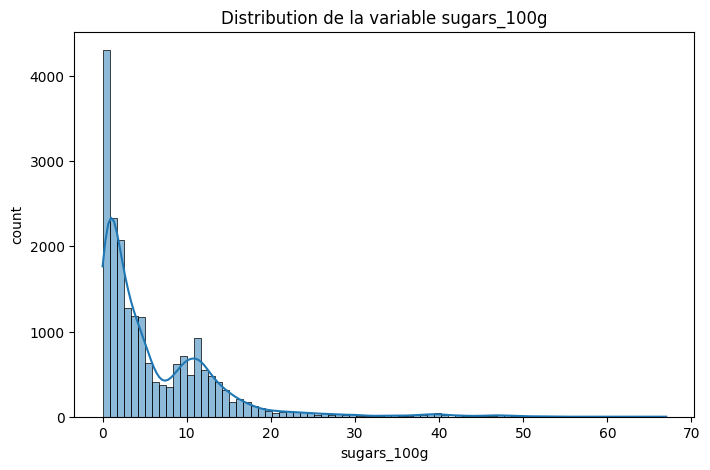

In [68]:
plt.figure(figsize=(8, 5))
sns.histplot(data_analisis['sugars_100g'], bins=80, kde=True)
plt.title('Distribution de la variable sugars_100g')
plt.xlabel('sugars_100g')
plt.ylabel('count')
plt.show()

### 002- Analyse du Boxplot(Interquartile) : sugars_100g 

C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


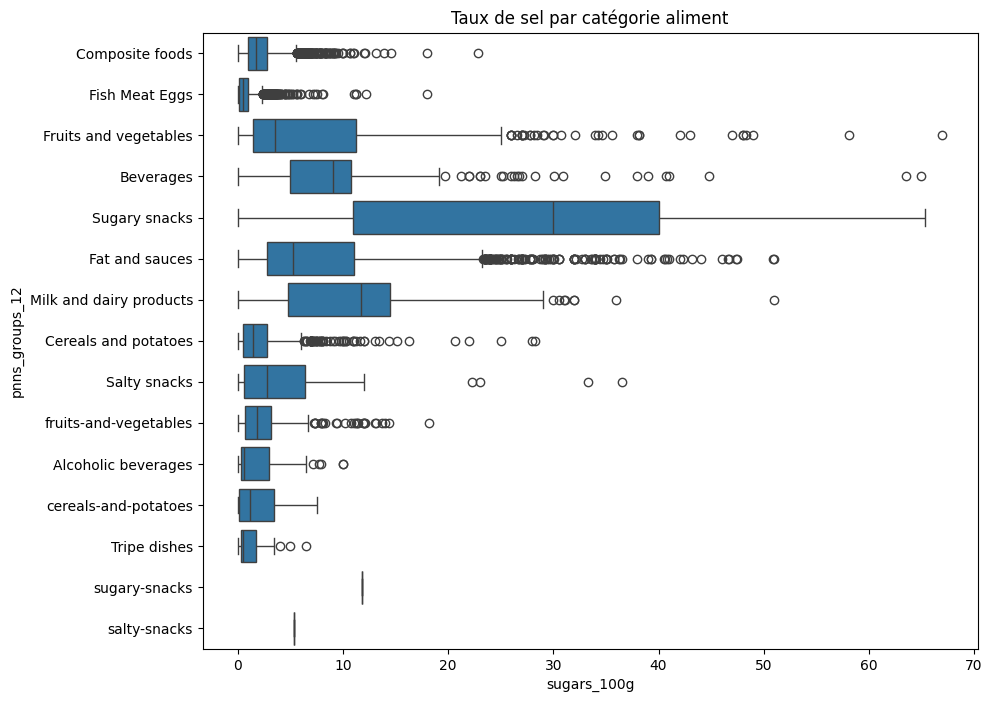

In [69]:
plt.figure(figsize=(10, 8))
sns.boxplot(data_analisis, x='sugars_100g', y='pnns_groups_12')
plt.title('Taux de sel par catégorie aliment')
plt.xlabel('sugars_100g')
plt.ylabel('pnns_groups_12')
plt.show()

### 003- Barplot: sugars_100g

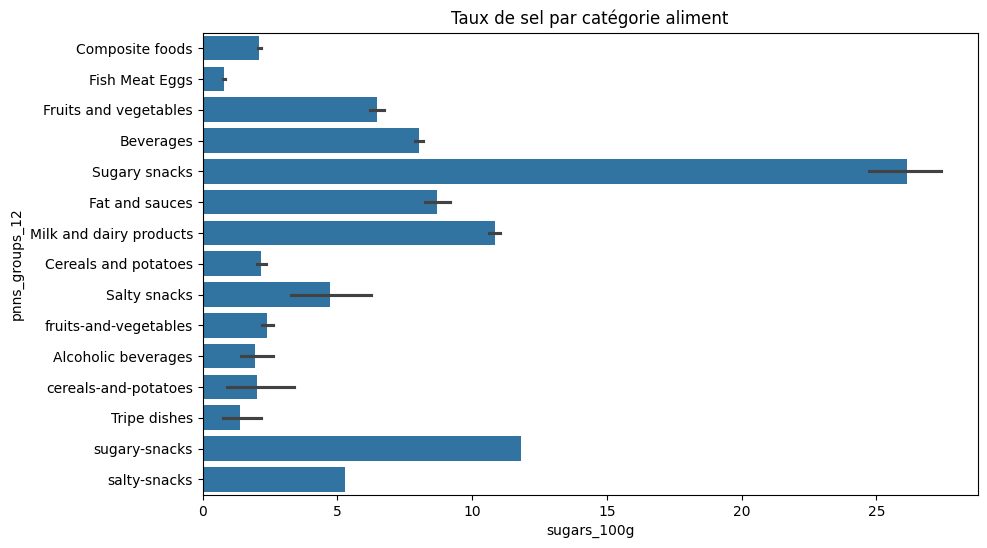

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data_analisis,x='sugars_100g', y='pnns_groups_12')
plt.title('Taux de sel par catégorie aliment')
plt.xlabel('sugars_100g')
plt.ylabel('pnns_groups_12')
plt.show()

Note: - L'application étant dédié au diabétique tout aliment contenant du sucre est à éviter. Mais les aliments tels que "Fish and meat eggs", "Fruits and Vegetables", " triple dishes" peuvent être recommandé surtout à consommer avec modération.
- L'aliment  "Sugary Snacks" sont à éviter formelement(médiane environ 35g).

###  004- Description: sugars_100g 

In [71]:
data_analisis['sugars_100g'].describe()

count    20319.000000
mean         6.239198
std          7.495425
min          0.000000
25%          1.000000
50%          3.500000
75%         10.000000
max         67.000000
Name: sugars_100g, dtype: float64

# 

# *********************************   Protéines  **********************************

### 001-  Distribution

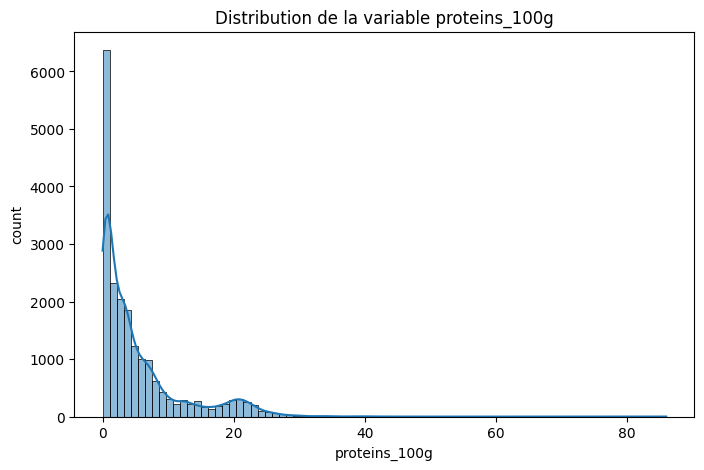

In [72]:
plt.figure(figsize=(8, 5))
sns.histplot(data_analisis['proteins_100g'], bins=80, kde=True)
plt.title('Distribution de la variable proteins_100g')
plt.xlabel('proteins_100g')
plt.ylabel('count')
plt.show()

### 002- Analyse du Boxplot(Interquartile) : proteins_100g 

C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


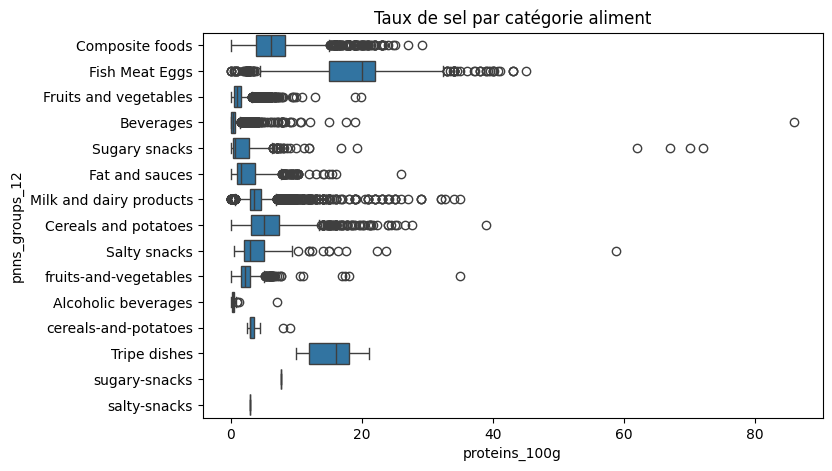

In [73]:
plt.figure(figsize=(8, 5))
sns.boxplot(data_analisis, x='proteins_100g', y='pnns_groups_12')
plt.title('Taux de sel par catégorie aliment')
plt.xlabel('proteins_100g')
plt.ylabel('pnns_groups_12')
plt.show()

### 0003- Barplot: proteins_100g

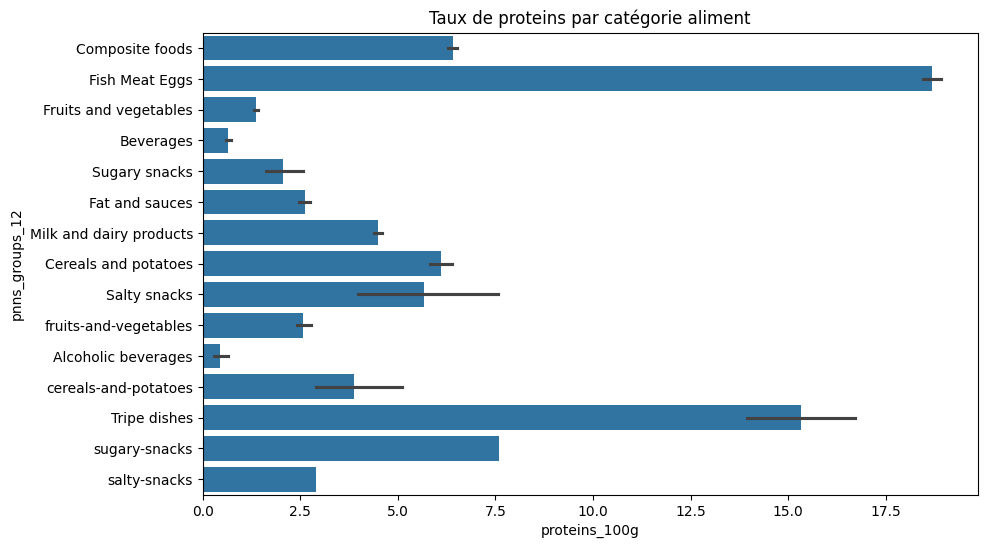

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data_analisis,x='proteins_100g', y='pnns_groups_12')
plt.title('Taux de proteins par catégorie aliment')
plt.xlabel('proteins_100g')
plt.ylabel('pnns_groups_12')
plt.show()

Note: Les deux catégories très riches en proteines sont: "Tripes disches" et "Fish Meat Eggs"
      En revange les catégories d'aliments très pauvre en proteines sont: "Alcoholic beverages" et "Beverages"

### 0004- Describtion

In [75]:
data_analisis['proteins_100g'].describe()

count    20319.000000
mean         5.320646
std          6.573361
min          0.000000
25%          0.700000
50%          3.000000
75%          6.900000
max         86.000000
Name: proteins_100g, dtype: float64

Note: 1/4 des aliments contiennent moins de 0.6g de proteine(très pauvre), 3/4 d'aliment ont 7g. En plus de la médiane plus ma moyenne on déduit on très peu d'aliment sont riches en protéine.

#

# *************************************   Fiber  ********************************************

### 0001-  Distribution

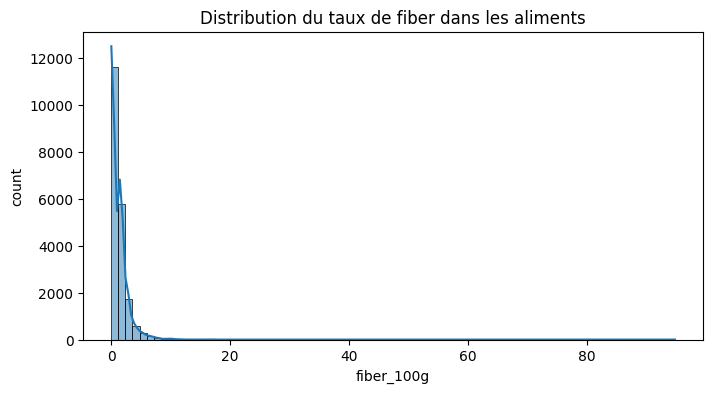

In [76]:
plt.figure(figsize=(8, 4))
sns.histplot(data_analisis['fiber_100g'], bins=80, kde=True)
plt.title('Distribution du taux de fiber dans les aliments')
plt.xlabel('fiber_100g')
plt.ylabel('count')
plt.show()

### 0002- Analyse du Boxplot(Interquartile) : fiber_100g 

C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


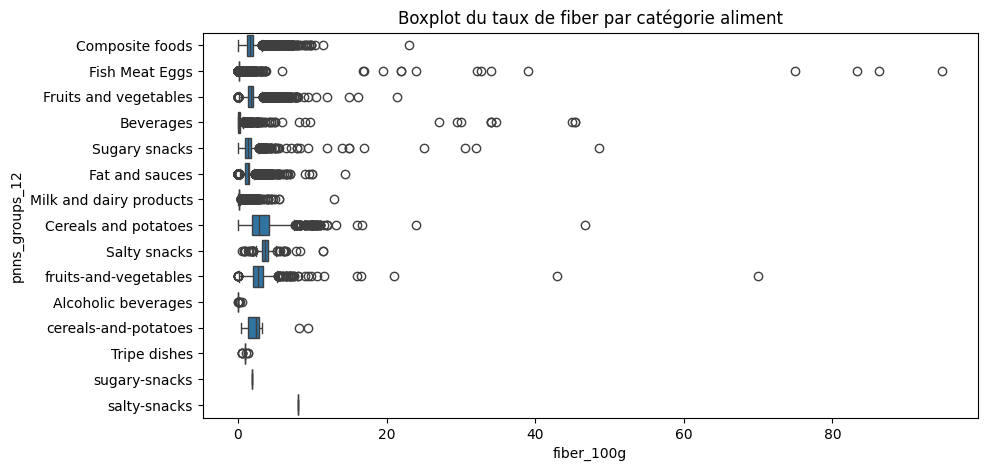

In [77]:
plt.figure(figsize=(10, 5))
sns.boxplot(data_analisis, x='fiber_100g', y='pnns_groups_12')
plt.title('Boxplot du taux de fiber par catégorie aliment')
plt.xlabel('fiber_100g')
plt.ylabel('pnns_groups_12')
plt.show()

### 0003- Barplot: fiber_100g

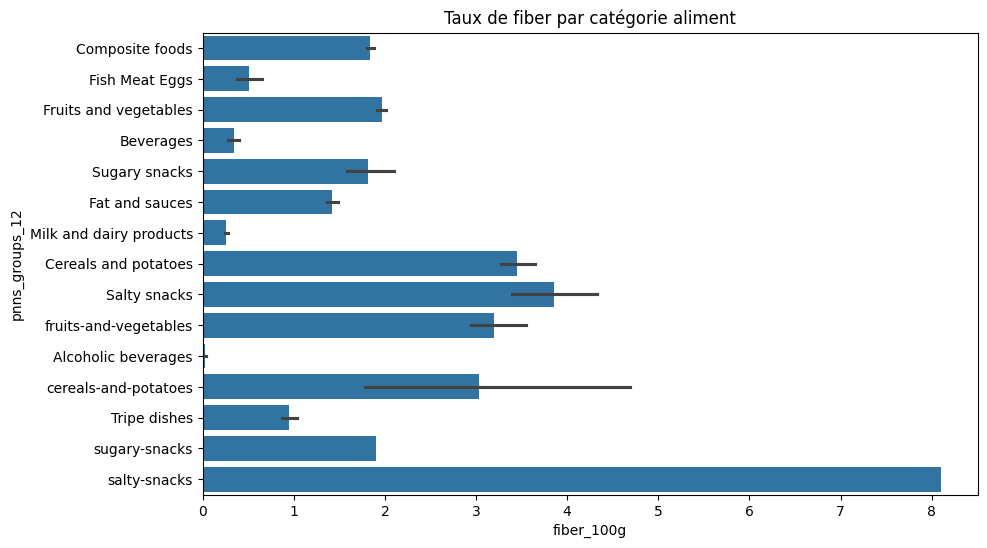

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(data_analisis,x='fiber_100g', y='pnns_groups_12')
plt.title('Taux de fiber par catégorie aliment')
plt.xlabel('fiber_100g')
plt.ylabel('pnns_groups_12')
plt.show()

Note: les aliments riches en fibre sont "salty snacks", "fruits-and-vegetables", "cereals and potatoes". Par contre catégories "salty snacks" necessite une analyse détaillé  car très salé donc à déconseiller aux diabétiques.

###  0004- Description: fiber_100g 

In [79]:
data_analisis["fiber_100g"].describe()

count    20319.000000
mean         1.234203
std          2.278334
min          0.000000
25%          0.100000
50%          0.800000
75%          1.700000
max         94.800000
Name: fiber_100g, dtype: float64

Note: Seulement 25% des aliments ont une proportion supérieur à 1,2g de fibre.

#

## ************************************ fruits-vegetables-nuts ******************************************

### 01- Distribution

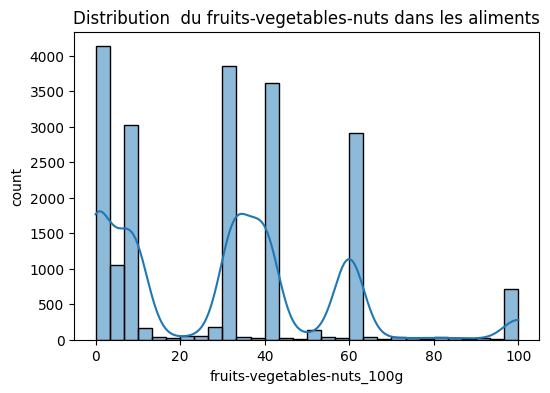

In [80]:
plt.figure(figsize=(6, 4))
sns.histplot(data_analisis['fruits-vegetables-nuts_100g'], bins=30, kde=True)
plt.title('Distribution  du fruits-vegetables-nuts dans les aliments')
plt.xlabel('fruits-vegetables-nuts_100g')
plt.ylabel('count')
plt.show()

### 02- Analyse du Boxplot(Interquartile) : fruits-vegetables-nuts_100g 

C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


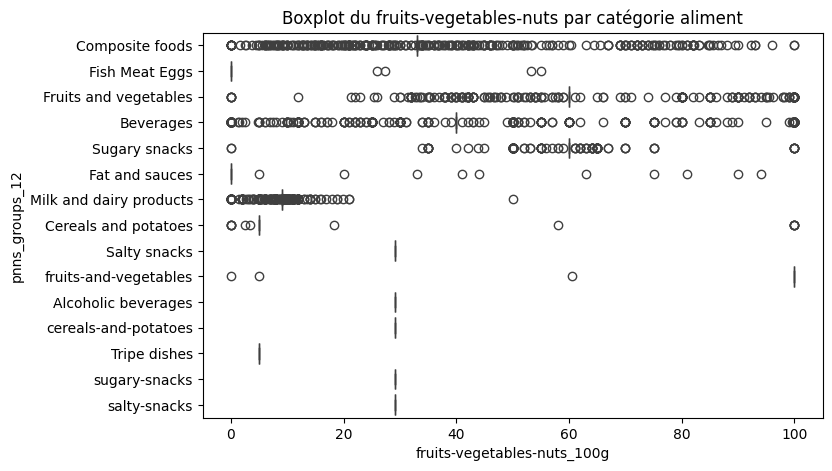

In [81]:
plt.figure(figsize=(8, 5))
sns.boxplot(data_analisis, x='fruits-vegetables-nuts_100g', y='pnns_groups_12')
plt.title('Boxplot du fruits-vegetables-nuts par catégorie aliment')
plt.xlabel('fruits-vegetables-nuts_100g')
plt.ylabel('pnns_groups_12')
plt.show()

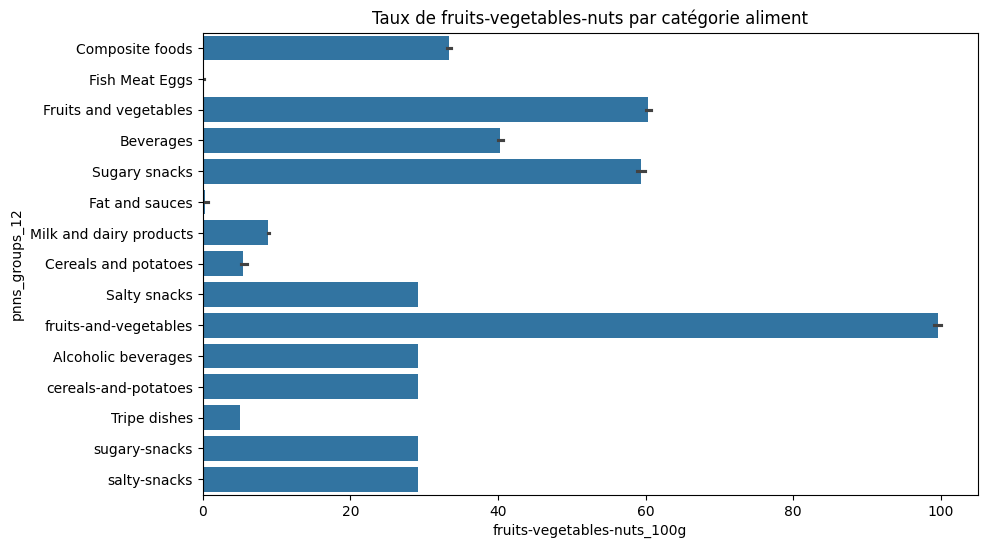

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(data_analisis,x='fruits-vegetables-nuts_100g', y='pnns_groups_12')
plt.title('Taux de fruits-vegetables-nuts par catégorie aliment')
plt.xlabel('fruits-vegetables-nuts_100g')
plt.ylabel('pnns_groups_12')
plt.show()

In [83]:
data_analisis["fruits-vegetables-nuts_100g"].describe()

count    20319.000000
mean        29.147301
std         25.222731
min          0.000000
25%          5.000000
50%         33.000000
75%         40.000000
max        100.000000
Name: fruits-vegetables-nuts_100g, dtype: float64

#

# ************************************** fat_100g*****************************************

### 01-  Distribution

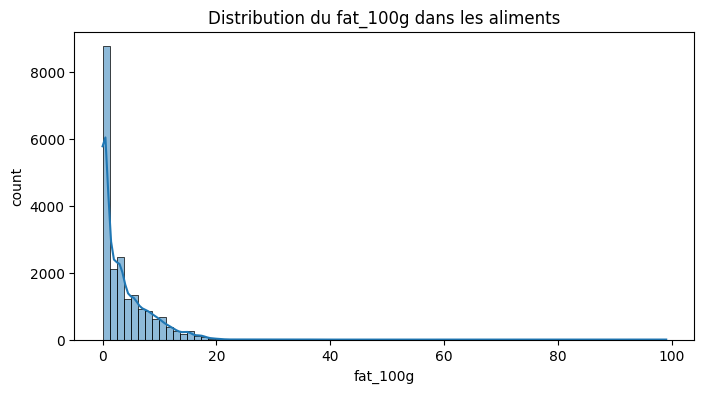

In [84]:
plt.figure(figsize=(8, 4))
sns.histplot(data_analisis['fat_100g'], bins=80, kde=True)
plt.title('Distribution du fat_100g dans les aliments')
plt.xlabel('fat_100g')
plt.ylabel('count')
plt.show()

### 02- Analyse du Boxplot(Interquartile) : fat_100g 

C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


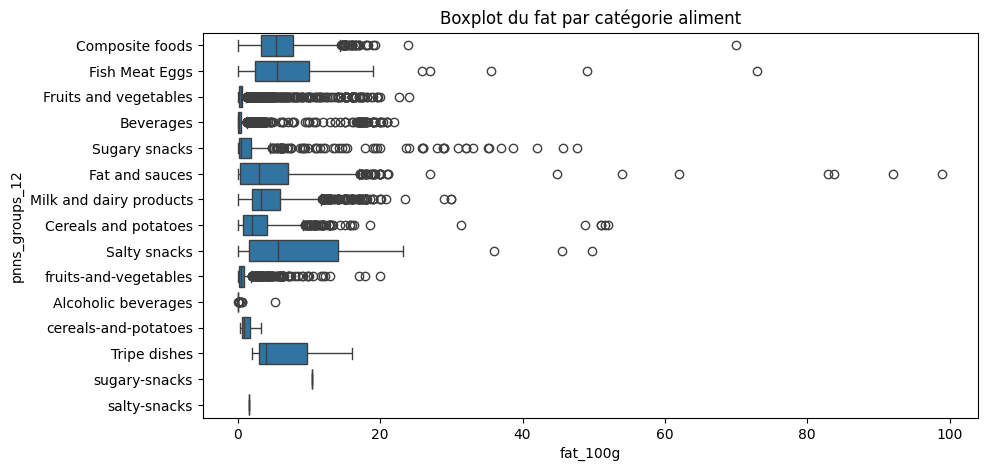

In [85]:
plt.figure(figsize=(10, 5))
sns.boxplot(data_analisis, x='fat_100g', y='pnns_groups_12')
plt.title('Boxplot du fat par catégorie aliment')
plt.xlabel('fat_100g')
plt.ylabel('pnns_groups_12')
plt.show()

### 03- Barplot: fat_100g

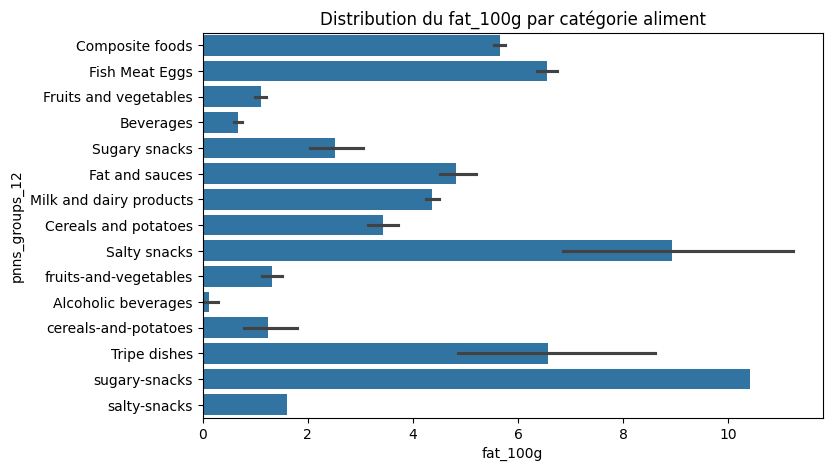

In [86]:
plt.figure(figsize=(8, 5))
sns.barplot(data_analisis,x='fat_100g', y='pnns_groups_12')
plt.title('Distribution du fat_100g par catégorie aliment')
plt.xlabel('fat_100g')
plt.ylabel('pnns_groups_12')
plt.show()

In [87]:
data_analisis['fat_100g'].describe()

count    20319.000000
mean         3.598716
std          4.607558
min          0.000000
25%          0.290000
50%          2.000000
75%          5.500000
max         99.000000
Name: fat_100g, dtype: float64

#

## ************************************* pnns_groups_12 ************************************************

In [88]:
data_analisis["pnns_groups_12"].value_counts()

pnns_groups_12
Composite foods            4141
Beverages                  3985
Milk and dairy products    3208
Fruits and vegetables      2643
Fish Meat Eggs             2549
Fat and sauces             1447
Cereals and potatoes        979
fruits-and-vegetables       595
Sugary snacks               593
Salty snacks                 74
Alcoholic beverages          67
Tripe dishes                 23
cereals-and-potatoes         13
sugary-snacks                 1
salty-snacks                  1
Name: count, dtype: int64

In [89]:
analisis_univarie = pd.pivot_table(data_analisis,index=["pnns_groups_12"], values= ["salt_100g","sugars_100g","fat_100g","fruits-vegetables-nuts_100g","fiber_100g","proteins_100g"])
analisis_univarie 

fat_100g  fiber_100g  fruits-vegetables-nuts_100g  \
pnns_groups_12                                                                
Alcoholic beverages       0.116119    0.020418                    29.147301   
Beverages                 0.670098    0.339846                    40.316537   
Cereals and potatoes      3.427166    3.447273                     5.528294   
Composite foods           5.645413    1.841436                    33.361133   
Fat and sauces            4.823804    1.422739                     0.377332   
Fish Meat Eggs            6.544333    0.507860                     0.063358   
Fruits and vegetables     1.101216    1.967547                    60.389160   
Milk and dairy products   4.369755    0.259842                     8.908516   
Salty snacks              8.934730    3.858108                    29.147301   
Sugary snacks             2.525771    1.813260                    59.359022   
Tripe dishes              6.563043    0.952174                     5.000000   
cereals-and-potatoes      1.246154    3.030769                    29.147301   
fruits-and-vegetables     1.315966    3.197891                    99.605882   
salty-snacks              1.600000    8.100000                    29.147301   
sugary-snacks            10.400000    1.900000                    29.147301   

                         proteins_100g  salt_100g  sugars_100g  
pnns_groups_12                                                  
Alcoholic beverages           0.434507   1.158162     1.959701  
Beverages                     0.651967   0.122308     8.021436  
Cereals and potatoes          6.103780   0.814394     2.181636  
Composite foods               6.403110   0.906581     2.107367  
Fat and sauces                2.615778   2.577896     8.681981  
Fish Meat Eggs               18.691008   1.711315     0.791325  
Fruits and vegetables         1.360457   0.569405     6.485519  
Milk and dairy products       4.482636   0.194038    10.833352  
Salty snacks                  5.672838   1.166977     4.722973  
Sugary snacks                 2.055933   0.097950    26.126948  
Tripe dishes                 15.339130   1.197443     1.404348  
cereals-and-potatoes          3.869231   0.012987     2.019231  
fruits-and-vegetables         2.580134   0.270956     2.390168  
salty-snacks                  2.900000   0.026457     5.300000  
sugary-snacks                 7.600000   1.180000    11.800000

### **Interprétation géneral de l'analyse univarié**

1- "Fibres" et "Protéines" : Ces éléments sont essentiels dans le régime alimentaire des diabétiques pour mieux gérer la glycémie. Les aliments riches en fibres et en protéines sont à privilégier.

2- "Sel", "Sucres", et "Graisses" : Les diabétiques doivent surveiller leur consommation de sel, de sucres ajoutés et de graisses saturées pour éviter des complications de santé.

3- "Fruits-Légumes-Noix" : Promouvoir des aliments ayant un pourcentage élevé de ces composants peut aider à maintenir une alimentation équilibrée et riche en nutriments.

4- "Score Nutritionnel" : Un score plus élevé indique un produit moins sain. Les gestionnaires d'alimentation pour diabétiques peuvent utiliser cette information pour recommander des aliments avec des scores nutritionnels faibles.


# 

# ********************************************************************************************                              

# *ANALYSE BI-VARIEE*

# ********************************************************************************************

#

### OBJECTIF

- **Dans cette partie il sera question d'examiner les relations entre deux variables pour mieux comprendre les interactions et les dépendances.** 

- **Pour une application dedié aux diabétiques, il est crucial de comprendre comment différents nutriments peuvent influencer des aspects critiques de la gestion du diabète, comme la glycémie.**

## A-  Analyse des correlations et visuelles pour chaque paire de nutiments

### 01- Analyse des correlation et visuelle entre "Sugars_100g" et "fiber_100g"

**Note**: Sachant que les **fibres** aide à ralentir **l'absorption du sucre**, ce qui est crucial pour 
les **diabétiques** en aidant à **maintenir des niveaux de glycémie stables**.

#####  A- CORRELATION

D'après notre heatmap(voir 02- Analyse des correlations: Heatmap) la correlation entre **sucre** et **fibres** à une 
valeur de **0,05**(une valeur loin de 1). D'ou 
**Il y'a une très faible correlation entre sucre et fibre**.

#### *B-  ANALYSE VISUELLE

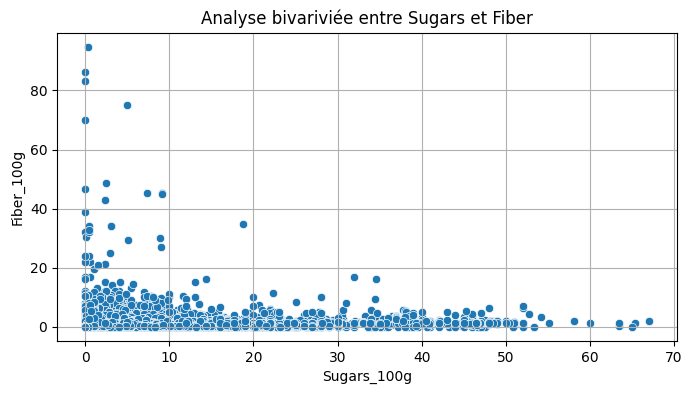

In [90]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='sugars_100g', y='fiber_100g', data=data_analisis)
plt.title('Analyse bivariviée entre Sugars et Fiber')
plt.xlabel('Sugars_100g')
plt.ylabel('Fiber_100g')
plt.grid(True)
plt.show()

#####

### 02- Analyse des correlations entre "Fat_100g" et "Proteins_100g"

**Note**: Les graisses et les protéines ont un impact moindre sur la **glycémie** par rapport aux **glucides**, 
mais leur équilibre est important

#####  A- CORRELATION

D'après notre heatmap(voir 02- Analyse des correlations: Heatmap) la correlation entre **Fat_100g** et **Proteins_100g** à une valeur de **0,15**(une valeur loin de 1).

Les graisses et les protéines jouent un rôle crucial dans la gestion du diabète. Les protéines ont peu d'effet sur la glycémie, mais elles doivent être équilibrées avec la consommation de graisses, surtout pour les diabétiques qui doivent surveiller leur santé cardiovasculaire en raison du risque accru de maladies cardiaques.

##### B-  ANALYSE VISUELLE

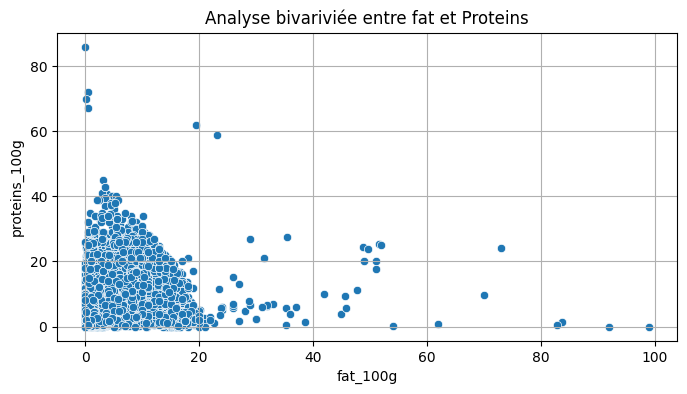

In [91]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='fat_100g', y='proteins_100g', data=data_analisis)
plt.title('Analyse bivariviée entre fat et Proteins')
plt.xlabel('fat_100g')
plt.ylabel('proteins_100g')
plt.grid(True)
plt.show()

######

### 03- Analyse des correlations entre "fruits-vegetables-nuts_100g" et "nutrition-score-fr_100g"

**Note:** Consommer des aliments riches en fruits, légumes et noix est souvent associé à un meilleur score nutritionnel et à des 
bienfaits pour la santé, y compris une meilleure gestion du diabète.

#####  A- CORRELATION

D'après notre heatmap(voir 02- Analyse des correlations: Heatmap) la correlation entre **fruits-vegetables-nuts_100g** et **nutrition-score-fr_100g** à une valeur de **0,23**(une valeur loin de **1**).

##### **B-  ANALYSE VISUELLE**

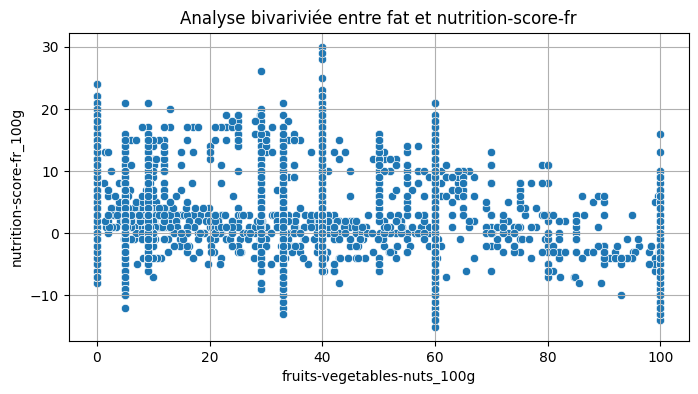

In [92]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='fruits-vegetables-nuts_100g', y='nutrition-score-fr_100g', data=data_analisis)
plt.title('Analyse bivariviée entre fat et nutrition-score-fr')
plt.xlabel('fruits-vegetables-nuts_100g')
plt.ylabel('nutrition-score-fr_100g')
plt.grid(True)
plt.show()

**Note:** Une alimentation riche en fruits, légumes et noix est généralement associée à un meilleur profil nutritionnel. 
Ces aliments sont non seulement riches en nutriments essentiels mais aussi en fibres, ce qui est bénéfique pour les 
diabétiques.

##### *Interprétation
**Corrélation négative** : une corrélation négative entre la consommation de fruits, 
légumes et noix et le score nutritionnel. Un score nutritionnel inférieur **(qui indique une meilleure qualité nutritionnelle)** serait associé à une **consommation plus élevée de ces aliments sains**.

**En résumé**: pour les diabétiques, choisir des aliments qui augmentent la teneur en protéines sans augmenter considérablement la teneur en graisses est essentiel**(fish Meat egg, fruits and vegetables)**, et privilégier une alimentation riche en fruits, légumes et noix peut contribuer à améliorer le profil nutritionnel global et aider à la gestion du diabète.


### C- Graphique en Nuage de Points Colorés

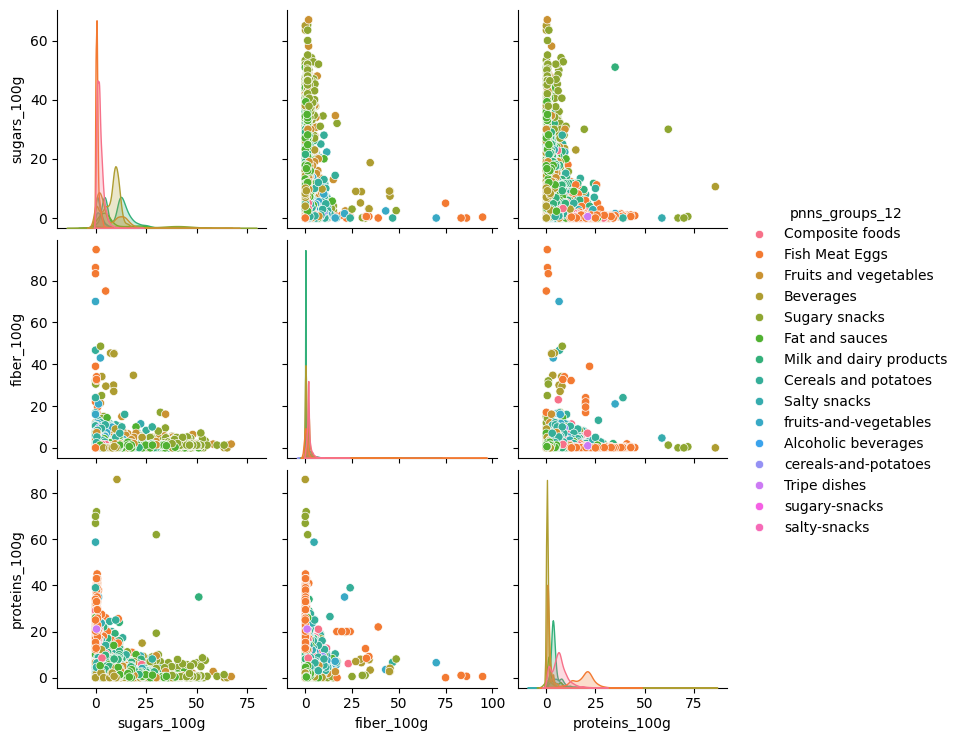

In [93]:
# Ignorer les avertissements futurs et spécifiques à Seaborn ou autres librairies
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')

sns.pairplot(data_analisis, hue='pnns_groups_12', vars=['sugars_100g', 'fiber_100g', 'proteins_100g'])
plt.show()

### D- Graphique en 3D

In [94]:
import plotly.express as px

# Créez un graphique en 3D
fig = px.scatter_3d(data_analisis, x='sugars_100g', y='fiber_100g', z='proteins_100g', color='pnns_groups_12')
fig.show()

In [95]:
target = pd.pivot_table(data_analisis,index=["pnns_groups_12"], values= ["salt_100g","sugars_100g","fat_100g","fruits-vegetables-nuts_100g","fiber_100g","proteins_100g"])
target

fat_100g  fiber_100g  fruits-vegetables-nuts_100g  \
pnns_groups_12                                                                
Alcoholic beverages       0.116119    0.020418                    29.147301   
Beverages                 0.670098    0.339846                    40.316537   
Cereals and potatoes      3.427166    3.447273                     5.528294   
Composite foods           5.645413    1.841436                    33.361133   
Fat and sauces            4.823804    1.422739                     0.377332   
Fish Meat Eggs            6.544333    0.507860                     0.063358   
Fruits and vegetables     1.101216    1.967547                    60.389160   
Milk and dairy products   4.369755    0.259842                     8.908516   
Salty snacks              8.934730    3.858108                    29.147301   
Sugary snacks             2.525771    1.813260                    59.359022   
Tripe dishes              6.563043    0.952174                     5.000000   
cereals-and-potatoes      1.246154    3.030769                    29.147301   
fruits-and-vegetables     1.315966    3.197891                    99.605882   
salty-snacks              1.600000    8.100000                    29.147301   
sugary-snacks            10.400000    1.900000                    29.147301   

                         proteins_100g  salt_100g  sugars_100g  
pnns_groups_12                                                  
Alcoholic beverages           0.434507   1.158162     1.959701  
Beverages                     0.651967   0.122308     8.021436  
Cereals and potatoes          6.103780   0.814394     2.181636  
Composite foods               6.403110   0.906581     2.107367  
Fat and sauces                2.615778   2.577896     8.681981  
Fish Meat Eggs               18.691008   1.711315     0.791325  
Fruits and vegetables         1.360457   0.569405     6.485519  
Milk and dairy products       4.482636   0.194038    10.833352  
Salty snacks                  5.672838   1.166977     4.722973  
Sugary snacks                 2.055933   0.097950    26.126948  
Tripe dishes                 15.339130   1.197443     1.404348  
cereals-and-potatoes          3.869231   0.012987     2.019231  
fruits-and-vegetables         2.580134   0.270956     2.390168  
salty-snacks                  2.900000   0.026457     5.300000  
sugary-snacks                 7.600000   1.180000    11.800000

#

## Analyse des composantes Principales: ACP

### 01- Vérification de la clartée des donnnées

In [96]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Alcoholic beverages to sugary-snacks
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fat_100g                     15 non-null     float64
 1   fiber_100g                   15 non-null     float64
 2   fruits-vegetables-nuts_100g  15 non-null     float64
 3   proteins_100g                15 non-null     float64
 4   salt_100g                    15 non-null     float64
 5   sugars_100g                  15 non-null     float64
dtypes: float64(6)
memory usage: 840.0+ bytes


In [97]:
# Nombre de doublons
target.duplicated().sum()

0

In [98]:
data_ACP = data_analisis.drop_duplicates()
data_ACP.head()

nutrition-score-fr_100g  fiber_100g  salt_100g  proteins_100g  fat_100g  \
6                   2.00000       0.357     0.4990           5.36      6.79   
7                   2.87792       0.130     0.7350          33.90     10.20   
17                  2.87792       1.800     0.0000           3.60      0.90   
19                 13.00000       0.100     0.1000           0.00      0.00   
28                  6.00000       0.000     0.0762           0.00      0.00   

    fruits-vegetables-nuts_100g  sugars_100g         pnns_groups_12  
6                          33.0        0.714        Composite foods  
7                           0.0        0.500         Fish Meat Eggs  
17                         60.0        2.500  Fruits and vegetables  
19                         40.0       10.400              Beverages  
28                         60.0       24.000          Sugary snacks

In [154]:
# description
data_ACP.describe()

nutrition-score-fr_100g    fiber_100g     salt_100g  proteins_100g  \
count             20214.000000  20214.000000  20214.000000   20214.000000   
mean                  2.877359      1.236479      0.772538       5.329455   
std                   5.849846      2.282338      1.703124       6.576363   
min                 -15.000000      0.000000      0.000000       0.000000   
25%                  -1.000000      0.100000      0.055150       0.700000   
50%                   2.877920      0.800000      0.370000       3.000000   
75%                   5.000000      1.700000      1.000000       6.982500   
max                  30.000000     94.800000     62.230000      86.000000   

           fat_100g  fruits-vegetables-nuts_100g   sugars_100g  
count  20214.000000                 20214.000000  20214.000000  
mean       3.606399                    29.137507      6.233385  
std        4.611271                    25.234319      7.495546  
min        0.000000                     0.000000      0.000000  
25%        0.300000                     5.000000      1.000000  
50%        2.000000                    33.000000      3.500000  
75%        5.500000                    40.000000     10.000000  
max       99.000000                   100.000000     67.000000

In [232]:
target1 = data_ACP[["fiber_100g","salt_100g","proteins_100g","sugars_100g","fat_100g","fruits-vegetables-nuts_100g"]]

In [237]:
X = target1.values
X[:5]

array([[ 0.357 ,  0.499 ,  5.36  ,  0.714 ,  6.79  , 33.    ],
       [ 0.13  ,  0.735 , 33.9   ,  0.5   , 10.2   ,  0.    ],
       [ 1.8   ,  0.    ,  3.6   ,  2.5   ,  0.9   , 60.    ],
       [ 0.1   ,  0.1   ,  0.    , 10.4   ,  0.    , 40.    ],
       [ 0.    ,  0.0762,  0.    , 24.    ,  0.    , 60.    ]])

In [238]:
names = target1.index
names

Index([    6,     7,    17,    19,    28,    38,    40,    43,    47,    48,
       ...
       71849, 71851, 71853, 71854, 71855, 71856, 71857, 71863, 71866, 71868],
      dtype='int64', length=20214)

In [239]:
feature = target1.columns
feature

Index(['fiber_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g',
       'fruits-vegetables-nuts_100g'],
      dtype='object')

### 02-  Scaling

In [240]:
# permet de standardiser les données en faisant une moyenne null et un ecart-type =1
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [241]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.38535088, -0.16061357,  0.00464471, -0.73637349,  0.69041252,
         0.15306888],
       [-0.48481277, -0.02204127,  4.34453711, -0.76492448,  1.42992321,
        -1.15470629],
       [ 0.24691125, -0.45361177, -0.26298705, -0.49809277, -0.58692413,
         1.22306674],
       [-0.49795752, -0.3948947 , -0.81041567,  0.55589251, -0.7821029 ,
         0.43047573],
       [-0.54177333, -0.40886936, -0.81041567,  2.37034818, -0.7821029 ,
         1.22306674]])

In [242]:
X_scaled = scaler.fit_transform(X)

In [200]:
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(1).loc[idx, :]

0    1    2    3    4    5    6
mean -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0

### 03-  Nombre de composante

In [243]:
n_components = 6

# instancie ACP
pca = PCA(n_components=n_components)
# entrainement sur les ojets scaler
pca.fit(X_scaled)

PCA(n_components=6)

#### Variance expliquée et diagramme de dispersion

In [244]:
pca.explained_variance_ratio_

array([0.34652273, 0.18703884, 0.14495019, 0.13640618, 0.10973356,
       0.07534851])

#### On déduit donc que la 1ère composante capte 34.65% de la variance de nos données initiales, la 2ème 18.7% , la troisième 14.5%, la quatrième 13.64%, la cinquième 10.97% et enfin 7.53%  etc.

In [245]:
buea = (pca.explained_variance_ratio_*100).round(2)
buea

array([34.65, 18.7 , 14.5 , 13.64, 10.97,  7.53])

In [246]:
buea_cum = buea.cumsum().round()
buea_cum

array([ 35.,  53.,  68.,  81.,  92., 100.])

In [247]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

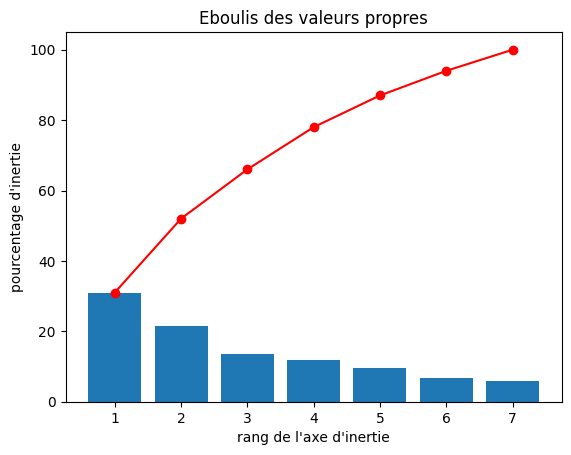

In [206]:
plt.bar(x_list, buea)
plt.plot(x_list, buea_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### **Remarque 1: On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

### **Remarque 2: On voit ici que près de 68% de la variance est comprise dans les 3 premières composantes, et près de 81% dans les 4 premières.

#####

### 04-  Calcul des composantes

In [248]:
pcs = pca.components_
pcs

array([[-0.05500392,  0.34844681,  0.56569257, -0.35442609,  0.4463596 ,
        -0.48030881],
       [ 0.79902824,  0.14864526,  0.00734193, -0.45121972,  0.01119722,
         0.36834758],
       [ 0.17054396,  0.82197138, -0.12406227,  0.4781498 , -0.19931287,
        -0.10739415],
       [ 0.46996164, -0.31972693, -0.05321746,  0.55083732,  0.56299684,
        -0.23171416],
       [ 0.32712895, -0.27805895,  0.30932384,  0.04661103, -0.6639534 ,
        -0.52629072],
       [-0.03957145, -0.03619885,  0.7523518 ,  0.36954207, -0.05579019,
         0.53983018]])

In [249]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5
0 -0.055004  0.348447  0.565693 -0.354426  0.446360 -0.480309
1  0.799028  0.148645  0.007342 -0.451220  0.011197  0.368348
2  0.170544  0.821971 -0.124062  0.478150 -0.199313 -0.107394
3  0.469962 -0.319727 -0.053217  0.550837  0.562997 -0.231714
4  0.327129 -0.278059  0.309324  0.046611 -0.663953 -0.526291
5 -0.039571 -0.036199  0.752352  0.369542 -0.055790  0.539830

In [250]:
pcs.columns = feature
pcs.index = [f"F{i}" for i in x_list]
pcs.T.round(2)

F1    F2    F3    F4    F5    F6
fiber_100g                  -0.06  0.80  0.17  0.47  0.33 -0.04
salt_100g                    0.35  0.15  0.82 -0.32 -0.28 -0.04
proteins_100g                0.57  0.01 -0.12 -0.05  0.31  0.75
sugars_100g                 -0.35 -0.45  0.48  0.55  0.05  0.37
fat_100g                     0.45  0.01 -0.20  0.56 -0.66 -0.06
fruits-vegetables-nuts_100g -0.48  0.37 -0.11 -0.23 -0.53  0.54

### A- Composantes F1 & F2 

##### - Calcul de la composante F1(Eureka)
F1 = (0.35 * salt_100g) + (0.35 * sugars_100g) + (0.45 * fat_100g) + (-0.06 * fiber_100g) + (0.57 * proteins_100g) + (-0.48 * fruits-vegetables-nuts)

##### - Calcul de la composante F2(Eureka)
F2 =  (-0.06 * fiber_100g) + (0.35 * salt_100g ) + (0.57 * proteins_100g) +  (-0.35 * sugars_100g) + (0.45 * fat_100g) +  (-0.48 * fruits-vegetables-nuts)

### Heatmap(correlation)

In [295]:
def correlation_graph(pca, 
                      x_y, 
                      feature) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    feature : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(7, 6))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                feature[i])
        # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [296]:
x_y = (0,1)
x_y

(0, 1)

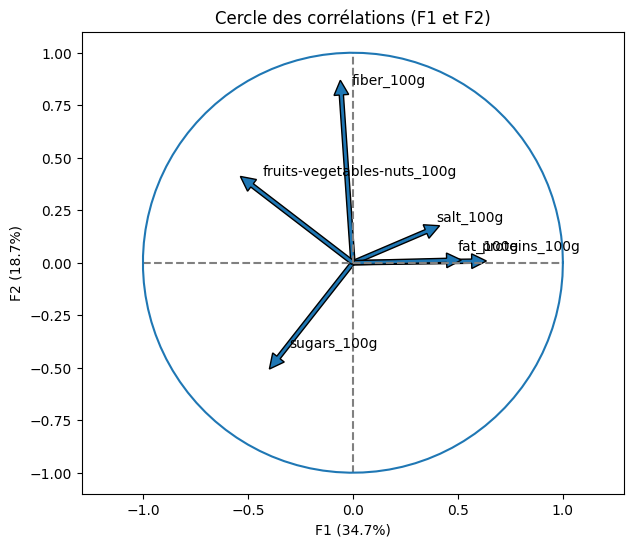

In [297]:
correlation_graph(pca, x_y, feature)

### B- Cercle de correlation (F3 et F4)

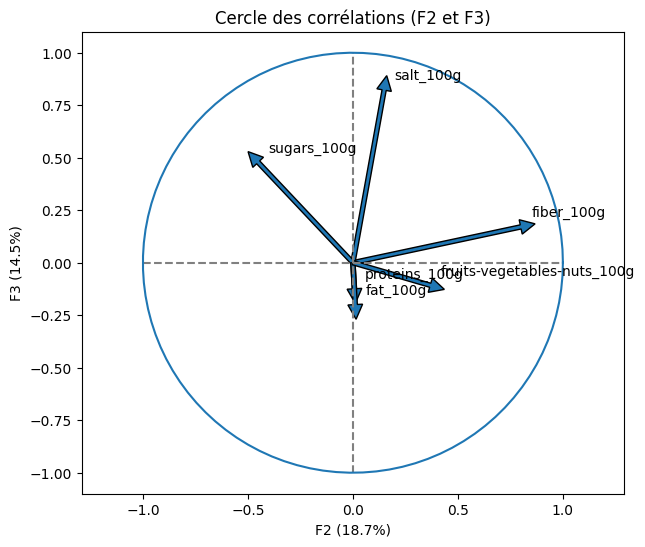

In [300]:
correlation_graph(pca, (1,2), feature)

#####

### Projection

In [258]:
# calculons les coordonnées dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj[:6] 

array([[ 0.4634999 ,  0.0646329 , -0.70445889, -0.182385  , -0.65324626,
        -0.20345065],
       [ 3.94064351, -0.42293122, -1.16653423,  0.19925365,  0.81405629,
         2.30281015],
       [-0.99330237,  0.79662202, -0.55065154, -0.61314018, -0.15166056,
         0.31771753],
       [-1.32153954, -0.56355371,  0.06647871, -0.29849664,  0.01486202,
        -0.09427491],
       [-2.3477778 , -1.12741024,  0.82998139,  0.50119503, -0.32814527,
         1.00634706],
       [ 0.52053256,  0.21508679, -0.38561427, -0.11017184, -0.23099924,
         0.2507172 ]])

In [307]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[8,6], 
                                marker="." ):
  
# Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (8,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) == 2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)
     # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des aliments (sur F{x+1} et F{y+1})")
    plt.show()   

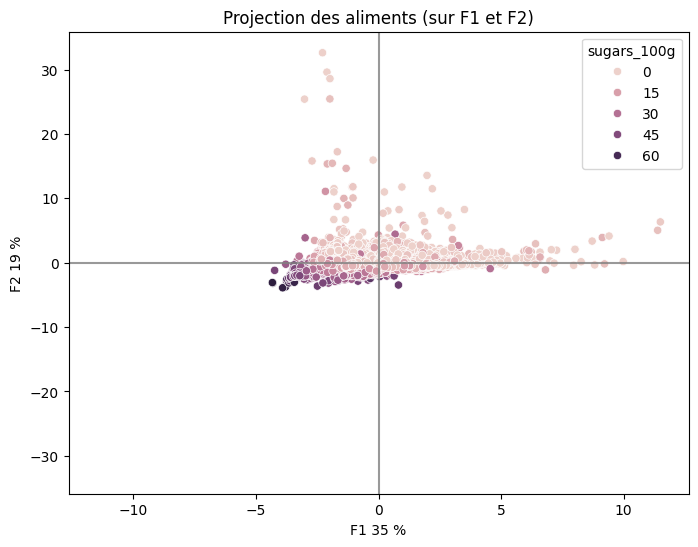

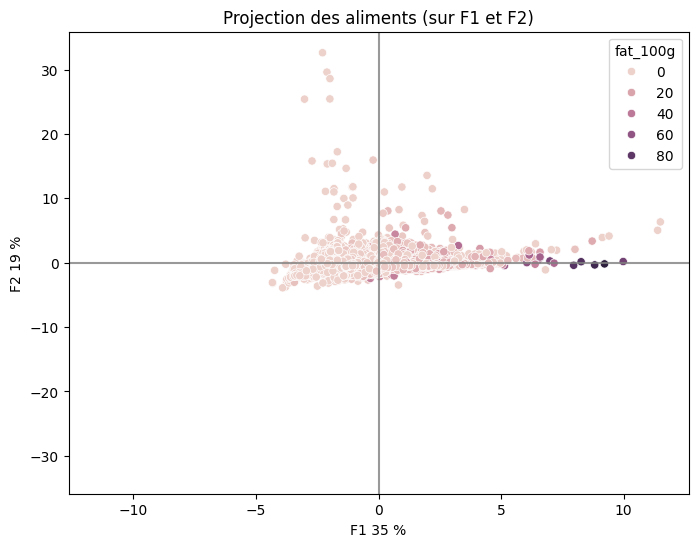

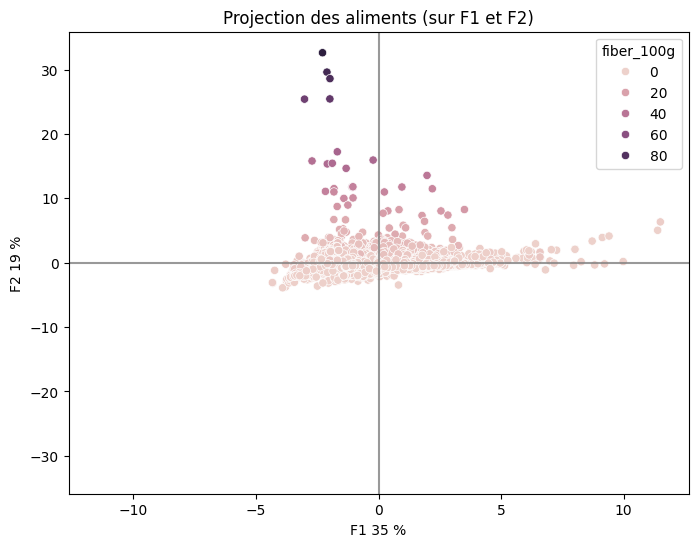

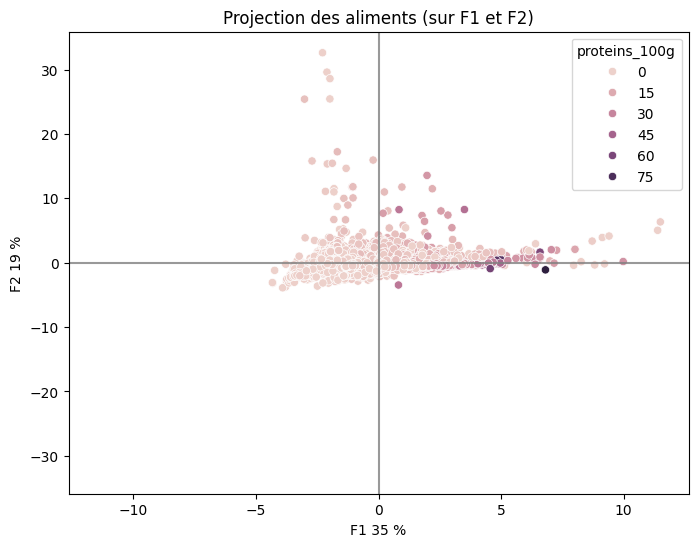

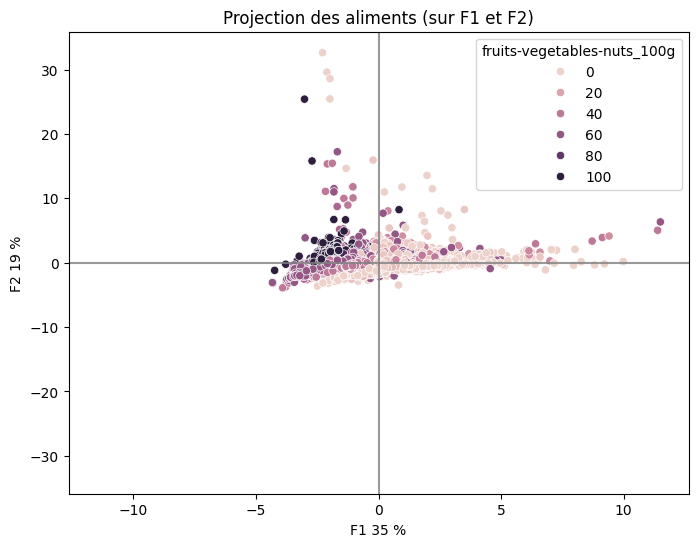

In [308]:
x_y = [0,1]

var = ["sugars_100g", "fat_100g", "fiber_100g", "proteins_100g", "fruits-vegetables-nuts_100g"]

# Loop through each variable and display its clusters
for v in var:
    clusters = data_ACP[v]  # Extract clusters for the current variable
    display_factorial_planes(X_proj, x_y, pca, clusters=clusters)

#

# ******************************************************************************************* 

 ##                          ANALYSE DE LA VARIANCE : ANOVA

# ********************************************************************************************

##### 

### - Les groupes d'aliments  semblent assez différentes  , même si l'ordre de grandeur de ces écarts varient 

### d'un aliment à l'autre. 

## *La question sera de savoir si ces écarts sont significatifs ou pas ?*

#### **** l'ANOVA nous permettra de répondre à cette question.

In [125]:
# Fitting ANOVA model
model = ols('sugars_100g ~ C(pnns_groups_12)', data=data_ACP).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results

sum_sq       df            F  PR(>F)
C(pnns_groups_12)  494095.740011     14.0  1111.199935     0.0
Residual           641535.562315  20199.0          NaN     NaN

#### **INTERPRETATION**

**o  P-value = 0  < 0,05**

Ce qui suggère que les différences observées dans les moyennes de teneur en sucres entre les différents groupes alimentaires sont **extrêmement statistiquement significatives**. Cela signifie qu'on' **rejete l'hypothèse nulle** selon laquelle toutes les catégories ont la même moyenne de teneur en sucres.

**o  F (Statistique F) = 1111.199935**

La statistique F est extrêmement élevée, ce qui indique une différence très significative entre les moyennes des groupes. 

**o Interprétation Globale**

Les résultats indiquent clairement que les catégories d'aliments ont un effet significatif sur la teneur en sucres des 
produits, avec une très forte probabilité que ces résultats ne soient pas dus au hasard. Étant donné la signification 
statistique, **il serait pertinent de poursuivre avec des tests POST-HOC (comme le test de Tukey) pour déterminer quelles 
paires spécifiques de catégories diffèrent significativement les unes des autres**.

## TEST DE TURKEY

In [126]:
# Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data_ACP['sugars_100g'], groups=data_ACP['pnns_groups_12'], alpha=0.05)
print(tukey)

C:\Users\521169\AppData\Roaming\Python\Python311\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning:

The integral is probably divergent, or slowly convergent.



                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                  group2         meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
    Alcoholic beverages               Beverages   5.9825    0.0   3.5739    8.391   True
    Alcoholic beverages    Cereals and potatoes   0.1455    1.0  -2.3208   2.6118  False
    Alcoholic beverages         Composite foods    0.068    1.0  -2.3397   2.4757  False
    Alcoholic beverages          Fat and sauces   6.6506    0.0   4.2087   9.0924   True
    Alcoholic beverages          Fish Meat Eggs  -1.2485 0.9172  -3.6677   1.1707  False
    Alcoholic beverages   Fruits and vegetables   4.4439    0.0   2.0257   6.8622   True
    Alcoholic beverages Milk and dairy products   8.8133    0.0   6.4002  11.2264   True
    Alcoholic beverages            Salty snacks   2.6842 0.2519  -0.5786    5.947  False
    Alcoholic beverag

**Note:** Les résultats du test de Tukey Honest Significant Difference (HSD) fournissent des comparaisons multiples entre les moyennes des différents groupes alimentaires de votre jeu de données concernant leur teneur en sucres.

### **o  Interprétation des Résultats**

**a**- Quand **reject = True** et **p-adj < 0.05**, cela signifie que la différence entre les moyennes des deux groupes 
est **statistiquement significative**. Par exemple, entre **"Alcoholic beverages" et "Beverages"**, la différence de la teneur en sucre est significative avec un meandiff de **5.9825** et une p-value de **0.0**.

**b**- Quand **reject = False**, cela signifie **qu'il n'y a pas de différence statistiquement significative** entre les groupes 
selon le niveau de confiance choisi.

### **o Comparaisons**

**a**- Les **Alcoholic beverages** ont significativement plus de sucres comparées à beaucoup d'autres catégories comme **Beverages**, **Fat and sauces**, **Fruits and vegetables**, **Milk and dairy products**, et **Sugary snacks**.

**b**- Les **Beverages** contiennent significativement moins de sucres que les **Sugary snacks**, ce qui est cohérent avec la nature de ces produits.

**c**- Des différences significatives sont aussi observées entre des groupes comme **Cereals and potatoes** et **Sugary snacks**, 
ce qui reflète probablement la haute teneur en **sucres** des **snacks sucrés**.

####

## Recommandations Nutritionnelles

### *01-  Privilégiez les Boissons Non Alcoolisées*

Les résultats montrent que **les boissons alcoolisées** contiennent significativement **plus de sucres** que **les boissons non alcoolisées**. Pour gérer efficacement **le taux de glycémie**, il est conseillé de limiter la consommation de **boissons alcoolisées** et de privilégier des **boissons non sucrées** ou des **boissons sans sucres ajoutés**.

### *02- Limitez les Snacks Sucrés*

Les **snacks sucrés** ont une teneur en sucres nettement supérieure à celle de nombreuses autres catégories, y compris 
les boissons et les aliments composés. Il est essentiel de réduire la consommation de ces produits pour **maintenir des 
niveaux de glycémie stables**. Optez pour des snacks à base de **fruits entiers, de noix, ou de légumes comme alternatives 
saines**.

### *03-  Choisissir  des Produits Laitiers avec Précaution*

Bien que les produits laitiers soient une source importante de calcium et de protéines, certains produits laitiers peuvent avoir une **teneur en sucres élevée**, notamment les **yaourts sucrés** et certains **fromages**. Vérifiez les étiquettes nutritionnelles et choisissez des options **faibles en sucres**.

### *04- Intégrez davantage de Fruits et Légumes*

Les **fruits et légumes**, en comparaison avec des **groupes comme les snacks sucrés**, ont généralement une teneur en **sucres naturellement régulée** par une **haute teneur en fibres**. Ils sont donc excellents pour les diabétiques, car ils aident à modérer la réponse **glycémique**.

### *05- Sauces et Condiments*

Les **sauces et condiments** peuvent parfois cacher des quantités significatives de sucres. Les résultats montrent que les 
sauces ont des **profils de sucres variés**, il est donc prudent de lire attentivement les étiquettes ou de choisir des versions**faibles en sucres** ou **faites maison sans ajout de sucres**.

#

# ********************************************************************************************

# **Rapport d'Exploration pour l'Application de Conseil pour Diabétiques**

# ********************************************************************************************

# 

### *Introduction*

Le développement d'une application de conseil nutritionnel pour diabétiques vise à fournir des recommandations personnalisées basées sur les profils nutritionnels des aliments. L'objectif est d'aider les utilisateurs diabétiques à  mieux gérer leur alimentation en évitant les aliments à haute teneur en sucres et en favorisant ceux qui contribuent à une  alimentation équilibrée et à un contrôle glycémique stable.

### Méthodologie

L'analyse s'est basée sur une base de données contenant des informations nutritionnelles détaillées pour divers groupes d'aliments. Nous avons utilisé des statistiques descriptives pour évaluer les tendances générales et l'analyse de variance (ANOVA) pour déterminer les différences significatives dans les teneurs en sucres entre les catégories d'aliments. Des tests post-hoc de Tukey ont été employés pour identifier précisément les paires de catégories entre lesquelles ces différences existent.

### Résultats

Les analyses ont révélé des variations significatives de la teneur en sucres parmi différentes catégories d'aliments. Par 
exemple, les snacks sucrés et certaines boissons contiennent des quantités élevées de sucres, tandis que les fruits et 
légumes présentent des niveaux plus modérés de sucres naturels accompagnés de fibres. Ces résultats fournissent une base 
solide pour des recommandations spécifiques, permettant aux diabétiques de faire des choix alimentaires plus informés.

### Défis et Solutions

**- Complexité des Données**
Les données nutritionnelles sont complexes et multidimensionnelles. Pour simplifier, nous avons priorisé les nutriments ayant le plus grand impact sur le diabète, comme les sucres et les fibres.

**- Personnalisation**
Chaque utilisateur diabétique peut avoir des besoins et des restrictions uniques. L'application doit être capable de s'adapter à ces variations à travers des profils utilisateurs personnalisés et des recommandations ajustables.

**- Mise à jour des Données** 
Les informations nutritionnelles peuvent évoluer. Il est crucial d'intégrer un système permettant une mise à jour régulière des données pour maintenir la pertinence de l'application.


###

## Conclusion générale

Le développement d'une application de conseil pour diabétiques est non seulement faisable mais aussi potentiellement très 
bénéfique pour la gestion du diabète. Les analyses montrent que des recommandations précises et basées sur des données 
peuvent être formulées pour aider les utilisateurs à faire des choix alimentaires qui favorisent une meilleure gestion de 
leur état de santé. La réussite de l'application dépendra de son accessibilité, de sa facilité d'utilisation, et de sa 
capacité à fournir des conseils personnalisés et scientifiquement valides. En poursuivant le développement et en intégrant 
des retours d'utilisateurs pour affiner l'application, il est possible de créer un outil précieux pour la communauté diabétique.